In [ ]:
import os

os.environ["ARXIV_API_KEY"] = ""
os.environ["PUBMED_API_KEY"] = ""
os.environ["CROSSREF_API_KEY"] = ""


In [ ]:
from dotenv import load_dotenv
load_dotenv()


False

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import time

queries = [

    "graph neural networks","explainable AI","federated learning",
    "edge computing","synthetic biology","digital twins",
    "biomedical informatics","CRISPR gene editing","blockchain in healthcare",
    "emotion recognition","autonomous vehicles","green computing",
    "AI ethics in medicine","AI in education","quantum machine learning",
    "computational sustainability", "climate change","quantum computing"


]


all_data = []

# Function to fetch data from ArXiv API
def fetch_arxiv_data(query, start=0, max_results=100):
    url = f"http://export.arxiv.org/api/query?search_query=all:{query}&start={start}&max_results={max_results}"
    response = requests.get(url)
    if response.status_code == 200:
        root = ET.fromstring(response.text)
        papers = []
        for entry in root.findall("{http://www.w3.org/2005/Atom}entry"):
            papers.append({
                'title': entry.find("{http://www.w3.org/2005/Atom}title").text,
                'abstract': entry.find("{http://www.w3.org/2005/Atom}summary").text,
                'published': entry.find("{http://www.w3.org/2005/Atom}published").text,
                'source': 'arXiv'
            })
        return papers
    return []



In [ ]:

# Function to fetch data from PubMed API
def fetch_pubmed_data(query, retmax=10):
    search_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term={query}&retmax={retmax}&retmode=json"
    search_response = requests.get(search_url).json()
    pmids = search_response.get('esearchresult', {}).get('idlist', [])
    papers = []
    if pmids:
        ids = ",".join(pmids)
        fetch_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&id={ids}&retmode=xml"
        fetch_response = requests.get(fetch_url)
        root = ET.fromstring(fetch_response.text)
        for article in root.findall(".//PubmedArticle"):
            title = article.find(".//ArticleTitle").text
            abstract = article.find(".//AbstractText")
            abstract = abstract.text if abstract is not None else "No abstract"
            date = article.find(".//PubDate/Year").text if article.find(".//PubDate/Year") else "No date"
            papers.append({
                'title': title,
                'abstract': abstract,
                'published': date,
                'source': 'PubMed'
            })
    return papers

In [ ]:
# Function to fetch data from CrossRef API
def fetch_crossref_data(query, rows=10):
    url = f"https://api.crossref.org/works?query={query}&rows={rows}"
    response = requests.get(url)
    papers = []
    if response.status_code == 200:
        results = response.json().get("message", {}).get("items", [])
        for item in results:
            title = item.get("title", ["No title"])[0]
            abstract = item.get("abstract", "No abstract")
            date_parts = item.get("published-print", {}).get("date-parts", [[None]])
            year = date_parts[0][0] if date_parts[0][0] is not None else "No date"
            papers.append({
                'title': title,
                'abstract': abstract,
                'published': year,
                'source': 'CrossRef'
            })
    return papers

In [ ]:
# Fetch data for each query from ArXiv, PubMed, and CrossRef
for query in queries:
    print(f"Fetching data for query: {query}")


    for start in range(0, 500, 100):  # Fetch up to 500 results in batches of 100
        all_data.extend(fetch_arxiv_data(query, start=start, max_results=100))
        time.sleep(1)  # Delay to avoid rate limits

    all_data.extend(fetch_pubmed_data(query))
    all_data.extend(fetch_crossref_data(query))


df = pd.DataFrame(all_data)
df['published_date'] = pd.to_datetime(df['published'], errors='coerce').dt.to_period("Y")
print(f"Total entries collected: {len(df)}")
df.head()

Fetching data for query: graph neural networks


/tmp/ipython-input-2667029804.py:16: DeprecationWarning: Testing an element's truth value will always return True in future versions.  Use specific 'len(elem)' or 'elem is not None' test instead.
  date = article.find(".//PubDate/Year").text if article.find(".//PubDate/Year") else "No date"


Fetching data for query: explainable AI
Fetching data for query: federated learning
Fetching data for query: edge computing
Fetching data for query: synthetic biology
Fetching data for query: digital twins
Fetching data for query: biomedical informatics
Fetching data for query: CRISPR gene editing
Fetching data for query: blockchain in healthcare
Fetching data for query: emotion recognition
Fetching data for query: autonomous vehicles
Fetching data for query: green computing
Fetching data for query: AI ethics in medicine
Fetching data for query: AI in education
Fetching data for query: quantum machine learning
Fetching data for query: computational sustainability
Fetching data for query: climate change
Fetching data for query: quantum computing
Total entries collected: 6654


/tmp/ipython-input-326035994.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['published_date'] = pd.to_datetime(df['published'], errors='coerce').dt.to_period("Y")


,title,abstract,published,source,published_date
0,A Survey on Graph Classification and Link Pred...,Traditional convolutional neural networks ar...,2023-07-03T09:08:01Z,arXiv,2023
1,Graph Structure of Neural Networks,Neural networks are often represented as gra...,2020-07-13T17:59:31Z,arXiv,2020
2,Sampling and Recovery of Graph Signals based o...,We propose interpretable graph neural networ...,2020-11-03T01:45:41Z,arXiv,2020
3,Graph Neural Networks for Small Graph and Gian...,Graph neural networks denote a group of neur...,2019-08-01T02:35:12Z,arXiv,2019
4,Graph Neural Processes: Towards Bayesian Graph...,"We introduce Graph Neural Processes (GNP), i...",2019-02-26T16:39:42Z,arXiv,2019


In [ ]:

import nltk
nltk.data.path.clear()

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 101.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install bertopic

In [ ]:
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

nlp = spacy.load("en_core_web_sm")


def preprocess_text(text):
    if text is None:
        return []
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

df['processed_abstract'] = df['abstract'].apply(preprocess_text)

df.head()


,title,abstract,published,source,published_date,processed_abstract
0,A Survey on Graph Classification and Link Pred...,Traditional convolutional neural networks ar...,2023-07-03T09:08:01Z,arXiv,2023,"[traditional, convolutional, neural, network, ..."
1,Graph Structure of Neural Networks,Neural networks are often represented as gra...,2020-07-13T17:59:31Z,arXiv,2020,"[neural, network, represent, graph, connection..."
2,Sampling and Recovery of Graph Signals based o...,We propose interpretable graph neural networ...,2020-11-03T01:45:41Z,arXiv,2020,"[propose, interpretable, graph, neural, networ..."
3,Graph Neural Networks for Small Graph and Gian...,Graph neural networks denote a group of neur...,2019-08-01T02:35:12Z,arXiv,2019,"[graph, neural, network, denote, group, neural..."
4,Graph Neural Processes: Towards Bayesian Graph...,"We introduce Graph Neural Processes (GNP), i...",2019-02-26T16:39:42Z,arXiv,2019,"[introduce, graph, neural, process, gnp, inspi..."


In [ ]:
import nltk
nltk.data.path.append('/usr/local/share/nltk_data/')

# Download necessary NLTK resources again
nltk.download('punkt', download_dir='/usr/local/share/nltk_data/')
nltk.download('stopwords', download_dir='/usr/local/share/nltk_data/')

[nltk_data] Downloading package punkt to
[nltk_data]     /usr/local/share/nltk_data/...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data/...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

df['published_date'] = pd.to_datetime(df['published'], errors='coerce').dt.to_period("Y")

# Save the DataFrame to an Excel file
output_file = "data.xlsx"
df.to_excel(output_file, index=False)

print(f"Data successfully saved to {output_file}")

Data successfully saved to data.xlsx


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# TF-IDF Analysis
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_abstract'].apply(lambda x: ' '.join(x)))
terms = tfidf_vectorizer.get_feature_names_out()


class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])
        return out


term_freq_time_series = df['processed_abstract'].apply(lambda x: ' '.join(x)).value_counts().sort_index()
data = []
labels = []
sequence_length = 10
for i in range(len(term_freq_time_series) - sequence_length):
    data.append(term_freq_time_series.values[i:i + sequence_length])
    labels.append(term_freq_time_series.values[i + sequence_length])

dataset = TensorDataset(torch.tensor(data, dtype=torch.float32), torch.tensor(labels, dtype=torch.float32))
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

input_size = 1
hidden_size = 50
output_size = 1
lstm_model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)

for epoch in range(50):
    for seq, target in data_loader:
        optimizer.zero_grad()
        output = lstm_model(seq.unsqueeze(-1))
        loss = criterion(output.squeeze(), target)
        loss.backward()
        optimizer.step()



In [ ]:
df['published_date'] = pd.to_datetime(df['published'], errors='coerce')
df['year'] = df['published_date'].dt.year
df['year'] = df['year'].astype('Int64')

In [ ]:
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

terms_of_interest = [
    "federated learning","edge computing","synthetic biology",
    "digital twins", "emotion recognition","autonomous vehicles",
    "green computing", "quantum machine learning","quantum computing",
    "climate change"]

term_embeddings_over_time = {}

# Process each term over all available years
for term in terms_of_interest:
    term_embeddings_over_time[term] = {}
    for year in sorted(df['year'].dropna().unique()):  # Ensure 'year' column exists and is valid
        # Filter abstracts published in the current year
        texts = df[df['year'] == year]['processed_abstract'].apply(lambda x: ' '.join(x)).tolist()

        # Initialize a list to store embeddings for each paper containing the term in the specified year
        yearly_embeddings = []

        for text in texts:
            # Only include papers containing the term
            if term in text:
                inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
                outputs = model(**inputs)
                embedding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
                yearly_embeddings.append(embedding)

        # Calculate the average embedding for the term in this year if any papers matched
        if yearly_embeddings:
            term_embeddings_over_time[term][year] = np.mean(yearly_embeddings, axis=0)
        else:
            term_embeddings_over_time[term][year] = None  # No data for this term in this year

volatility_scores = {}
for term, yearly_embeddings in term_embeddings_over_time.items():
    years = sorted(yearly_embeddings.keys())
    scores = []
    for i in range(1, len(years)):
        if yearly_embeddings[years[i - 1]] is not None and yearly_embeddings[years[i]] is not None:
            # Compute cosine similarity between consecutive years
            sim = cosine_similarity(yearly_embeddings[years[i - 1]], yearly_embeddings[years[i]])
            scores.append(1 - sim[0][0])  # Volatility is 1 - similarity
    volatility_scores[term] = np.mean(scores) if scores else 0

print("Context Volatility Scores:\n", volatility_scores)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Context Volatility Scores:
 {'federated learning': np.float32(0.012997465), 'edge computing': np.float32(0.010773599), 'synthetic biology': np.float32(0.041864745), 'digital twins': 0, 'emotion recognition': np.float32(0.019644223), 'autonomous vehicles': 0, 'green computing': np.float32(0.15005168), 'quantum machine learning': np.float32(0.03251736), 'quantum computing': np.float32(0.07014105), 'climate change': np.float32(0.049413692)}


In [ ]:
# Calculate term frequencies
term_frequencies = {term: {} for term in terms_of_interest}

for term in terms_of_interest:
    for year in sorted(df['year'].dropna().unique()):
        # Count occurrences of the exact term in abstracts for the given year
        term_frequencies[term][year] = df[df['year'] == year]['processed_abstract'].apply(
            lambda x: f" {term} " in f" {' '.join(x)} ".lower()  # Ensure exact matching
        ).sum()

term_frequencies_df = pd.DataFrame(term_frequencies).fillna(0).astype(int)
term_frequencies_df.index.name = 'Year'

In [ ]:
ranks = term_frequencies_df["emotion recognition"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'biomedical informatics': {rank_based_volatility}\n")
print(ranks)

Rank-Based Volatility for 'biomedical informatics': 0.8787878787878788

Year
1992    15.0
1993    15.0
1994    15.0
1995    15.0
1996    15.0
1997    15.0
1998    15.0
1999    15.0
2000    15.0
2001    15.0
2002    15.0
2003    15.0
2004    15.0
2005    15.0
2006    15.0
2007    15.0
2008    15.0
2009    13.0
2010    15.0
2011    15.0
2012    11.0
2013    15.0
2014    13.0
2015    11.0
2016    10.0
2017     9.0
2018     7.0
2019     8.0
2020     6.0
2021     5.0
2022     4.0
2023     3.0
2024     1.0
2025     2.0
Name: emotion recognition, dtype: float64


In [ ]:
ranks = term_frequencies_df["quantum machine learning"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'quantum machine learning': {rank_based_volatility}\n")
print(ranks)

Rank-Based Volatility for 'quantum machine learning': 0.6060606060606061

Year
1992    14.0
1993    14.0
1994    14.0
1995    14.0
1996    14.0
1997    14.0
1998    14.0
1999    14.0
2000    14.0
2001    14.0
2002    14.0
2003    14.0
2004    14.0
2005    14.0
2006    14.0
2007    14.0
2008    14.0
2009    14.0
2010    14.0
2011    14.0
2012    14.0
2013    11.0
2014    11.0
2015    11.0
2016     9.0
2017     9.0
2018     8.0
2019     7.0
2020     6.0
2021     3.0
2022     5.0
2023     2.0
2024     1.0
2025     4.0
Name: quantum machine learning, dtype: float64


In [ ]:
ranks = term_frequencies_df["federated learning"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'federated learning': {rank_based_volatility}\n")
print(ranks)

Rank-Based Volatility for 'federated learning': 0.5151515151515151

Year
1992    9.0
1993    9.0
1994    9.0
1995    9.0
1996    9.0
1997    9.0
1998    9.0
1999    9.0
2000    9.0
2001    9.0
2002    9.0
2003    9.0
2004    9.0
2005    9.0
2006    9.0
2007    9.0
2008    9.0
2009    9.0
2010    9.0
2011    9.0
2012    9.0
2013    9.0
2014    9.0
2015    9.0
2016    9.0
2017    9.0
2018    8.0
2019    7.0
2020    3.0
2021    5.0
2022    3.0
2023    1.0
2024    2.0
2025    6.0
Name: federated learning, dtype: float64


In [ ]:
ranks = term_frequencies_df["synthetic biology"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'synthetic biology': {rank_based_volatility}\n")
print(ranks)

Rank-Based Volatility for 'synthetic biology': 2.272727272727273

Year
1992    20.0
1993    20.0
1994    20.0
1995    20.0
1996    20.0
1997    20.0
1998    20.0
1999    20.0
2000    20.0
2001    20.0
2002    20.0
2003    20.0
2004    20.0
2005    20.0
2006    20.0
2007    18.0
2008    18.0
2009    16.0
2010    16.0
2011    14.0
2012    12.0
2013     5.0
2014     5.0
2015     8.0
2016    11.0
2017     7.0
2018    10.0
2019     3.0
2020    14.0
2021     4.0
2022     8.0
2023    12.0
2024     2.0
2025     1.0
Name: synthetic biology, dtype: float64


In [ ]:
ranks = term_frequencies_df["digital twins"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'digital twins': {rank_based_volatility}\n")
print(ranks)

Rank-Based Volatility for 'digital twins': 0.030303030303030304

Year
1992    2.0
1993    2.0
1994    2.0
1995    2.0
1996    2.0
1997    2.0
1998    2.0
1999    2.0
2000    2.0
2001    2.0
2002    2.0
2003    2.0
2004    2.0
2005    2.0
2006    2.0
2007    2.0
2008    2.0
2009    2.0
2010    2.0
2011    2.0
2012    2.0
2013    2.0
2014    2.0
2015    2.0
2016    2.0
2017    2.0
2018    2.0
2019    2.0
2020    2.0
2021    2.0
2022    2.0
2023    2.0
2024    2.0
2025    1.0
Name: digital twins, dtype: float64


In [ ]:
ranks = term_frequencies_df["edge computing"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'edge computing': {rank_based_volatility}\n")
print(ranks)


Rank-Based Volatility for 'edge computing': 0.8181818181818182

Year
1992    11.0
1993    11.0
1994    11.0
1995    11.0
1996    11.0
1997    11.0
1998    11.0
1999    11.0
2000    11.0
2001    11.0
2002    11.0
2003    11.0
2004    11.0
2005    11.0
2006    11.0
2007    11.0
2008    11.0
2009    11.0
2010    11.0
2011    11.0
2012    11.0
2013    11.0
2014    11.0
2015    11.0
2016    10.0
2017     9.0
2018     7.0
2019     2.0
2020     4.0
2021     1.0
2022     7.0
2023     5.0
2024     3.0
2025     6.0
Name: edge computing, dtype: float64


In [ ]:
ranks = term_frequencies_df["green computing"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'edge computing': {rank_based_volatility}\n")
print(ranks)

Rank-Based Volatility for 'edge computing': 1.4848484848484849

Year
1992    8.0
1993    8.0
1994    8.0
1995    8.0
1996    8.0
1997    8.0
1998    8.0
1999    8.0
2000    8.0
2001    8.0
2002    8.0
2003    8.0
2004    8.0
2005    8.0
2006    8.0
2007    8.0
2008    8.0
2009    3.0
2010    8.0
2011    8.0
2012    3.0
2013    8.0
2014    3.0
2015    8.0
2016    8.0
2017    8.0
2018    3.0
2019    3.0
2020    2.0
2021    8.0
2022    8.0
2023    8.0
2024    8.0
2025    1.0
Name: green computing, dtype: float64


In [ ]:
ranks = term_frequencies_df["climate change"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'climate change': {rank_based_volatility}\n")
print(ranks)

Rank-Based Volatility for 'climate change': 1.7878787878787878

Year
1992    24.0
1993    24.0
1994    24.0
1995    24.0
1996    24.0
1997    24.0
1998    24.0
1999    24.0
2000    24.0
2001    24.0
2002    24.0
2003    21.0
2004    18.0
2005    18.0
2006    18.0
2007    21.0
2008    12.0
2009    15.0
2010    15.0
2011    14.0
2012    15.0
2013    21.0
2014    11.0
2015    10.0
2016     9.0
2017    12.0
2018     7.0
2019     7.0
2020     5.0
2021     4.0
2022     5.0
2023     2.0
2024     1.0
2025     3.0
Name: climate change, dtype: float64


In [ ]:
ranks = term_frequencies_df["quantum computing"].rank(method="min", ascending=False)

rank_diff = ranks.diff().abs()

# Compute rank-based volatility
rank_based_volatility = rank_diff.mean()

print(f"Rank-Based Volatility for 'quantum computing': {rank_based_volatility}\n")
print(ranks)

Rank-Based Volatility for 'quantum computing': 4.636363636363637

Year
1992    31.0
1993    31.0
1994    24.0
1995    31.0
1996    18.0
1997    24.0
1998    31.0
1999    12.0
2000    10.0
2001    24.0
2002    24.0
2003    24.0
2004    12.0
2005    12.0
2006    18.0
2007    18.0
2008    18.0
2009    24.0
2010    24.0
2011    12.0
2012    18.0
2013    18.0
2014     8.0
2015    12.0
2016     8.0
2017    12.0
2018    10.0
2019     7.0
2020     6.0
2021     5.0
2022     3.0
2023     4.0
2024     1.0
2025     2.0
Name: quantum computing, dtype: float64


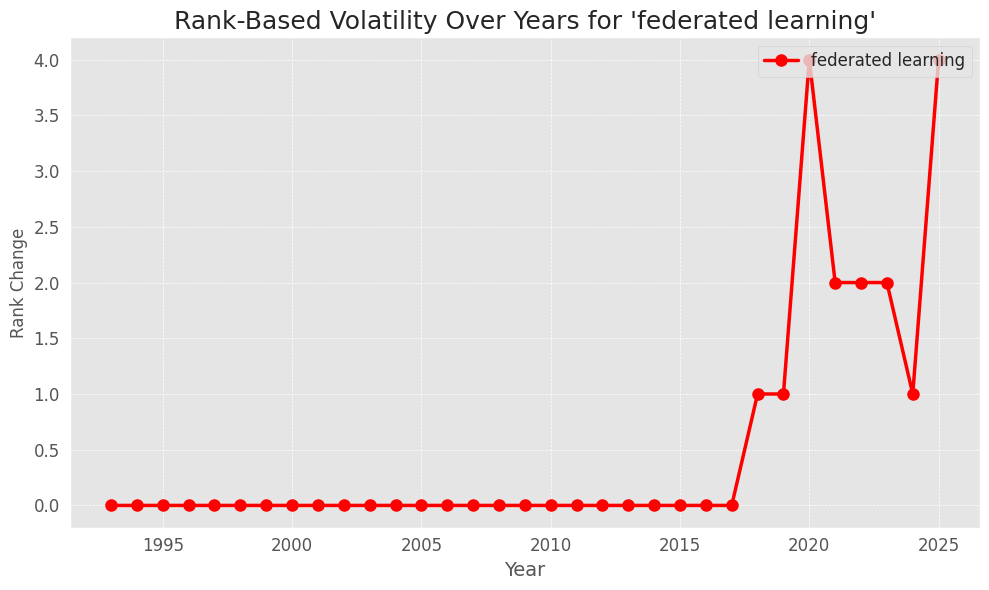

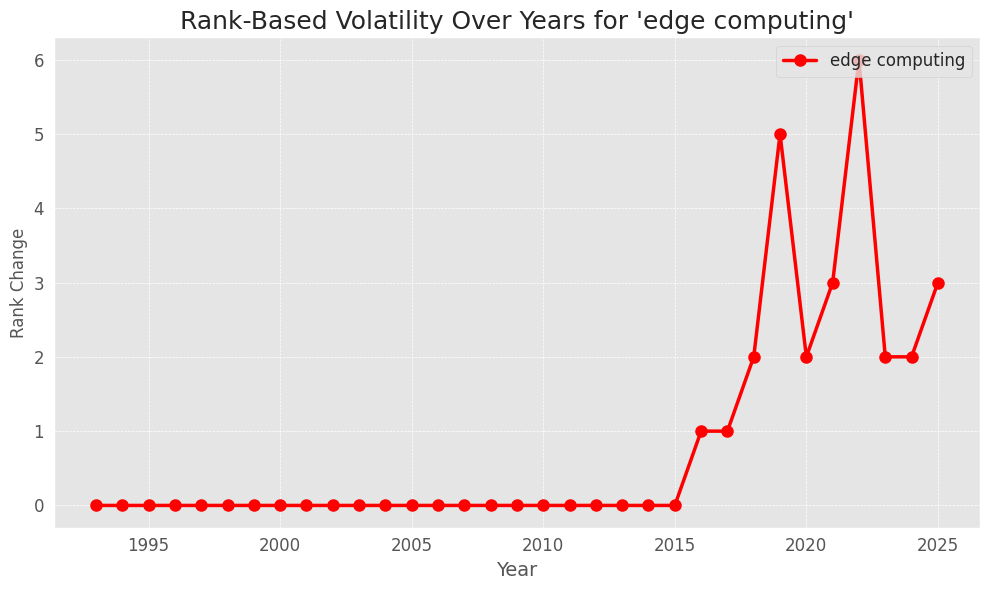

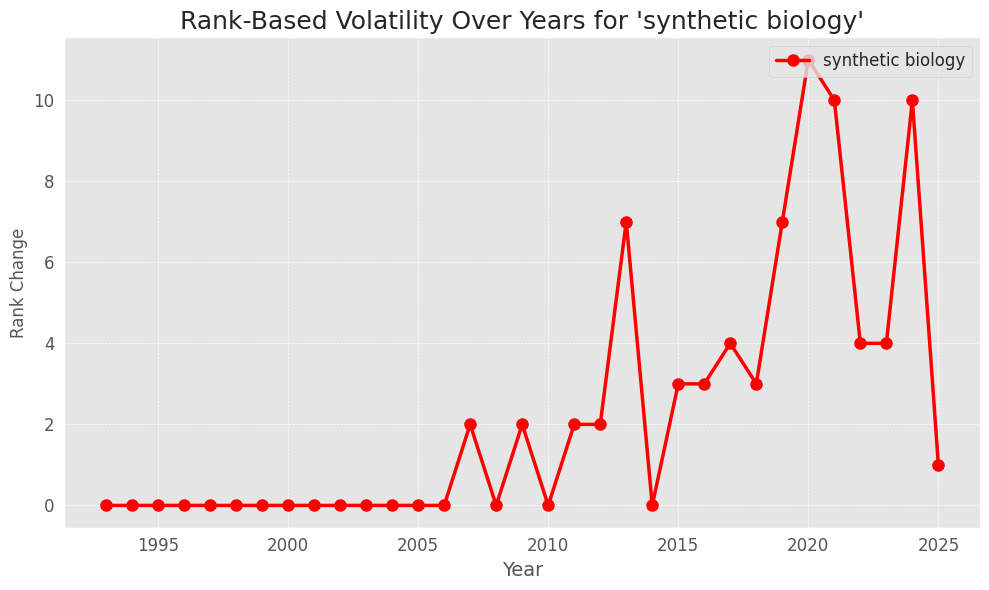

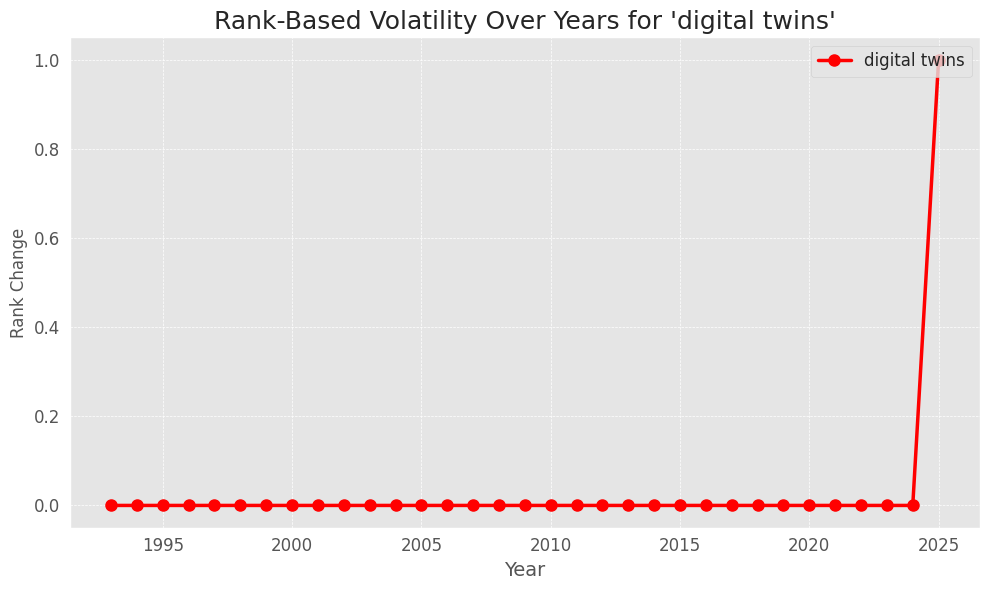

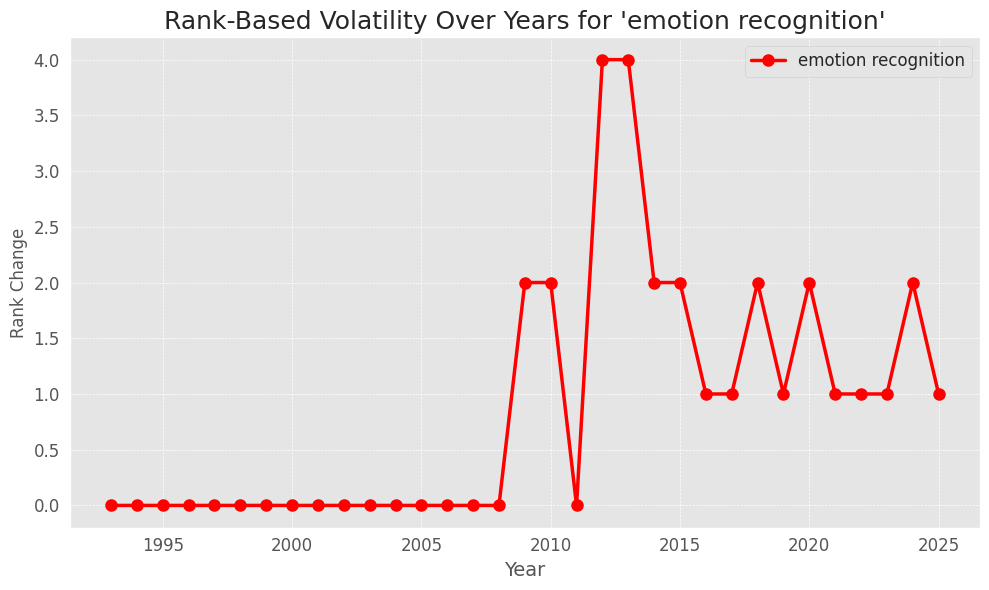

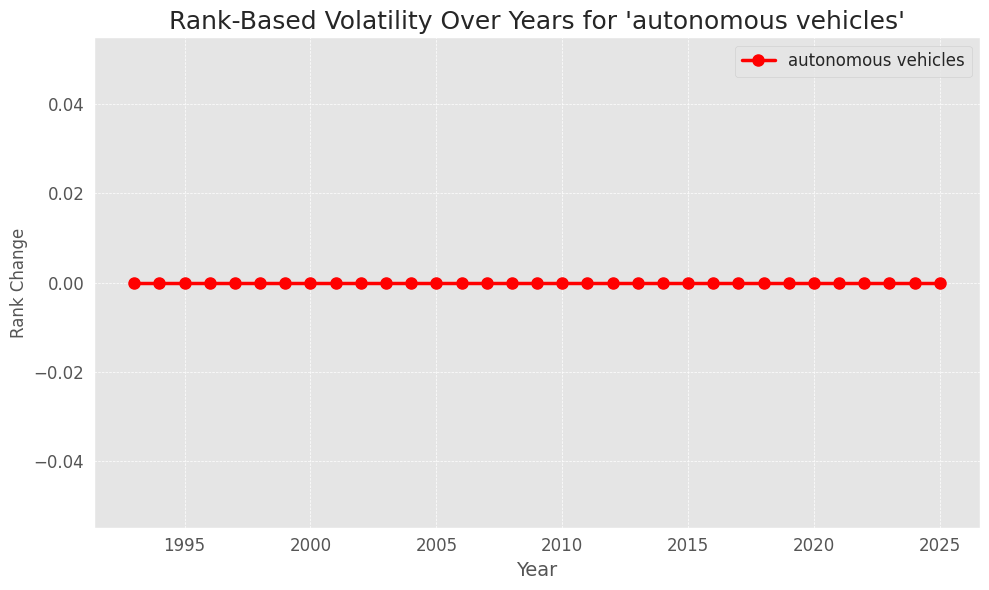

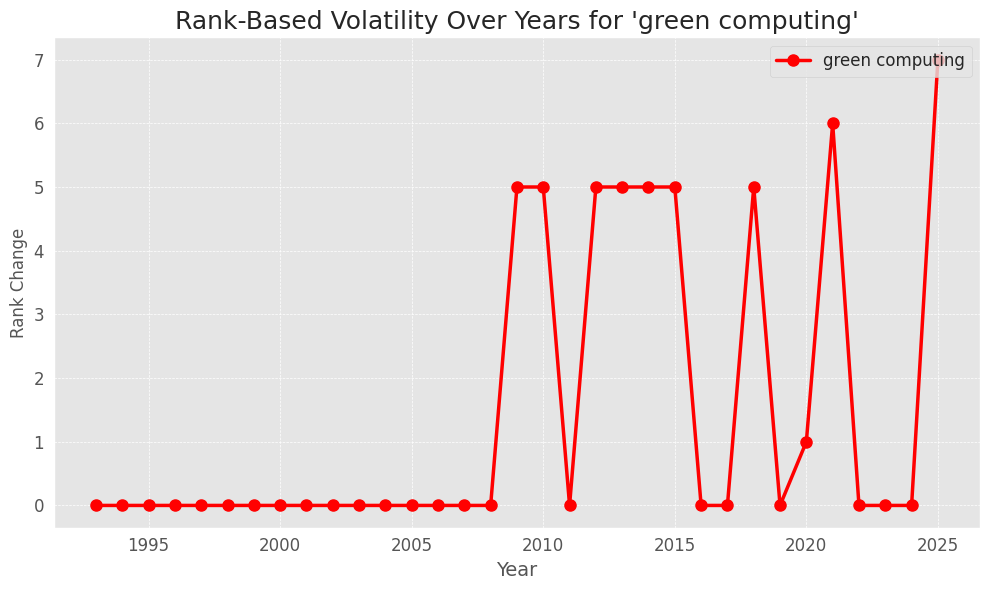

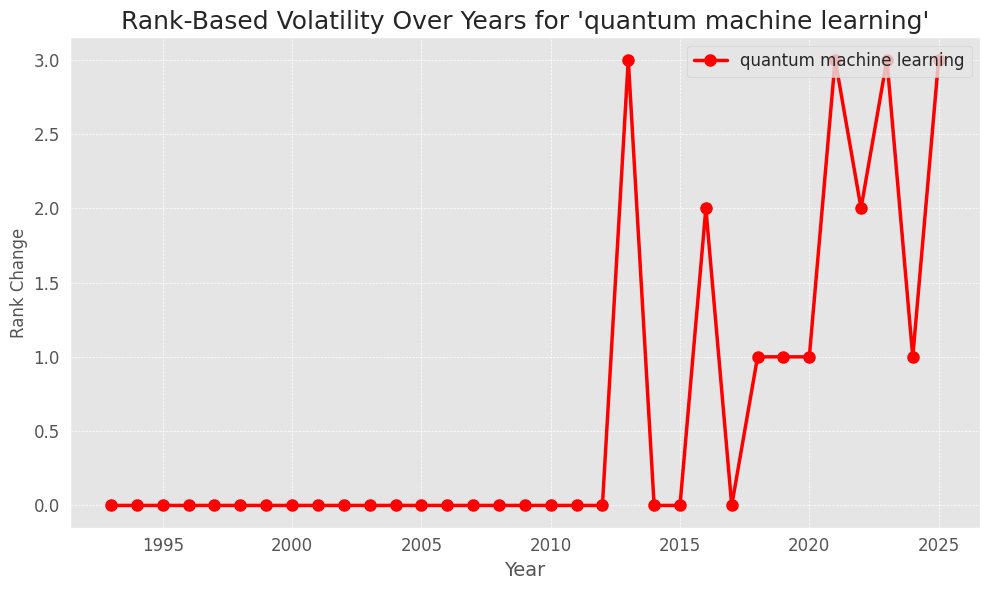

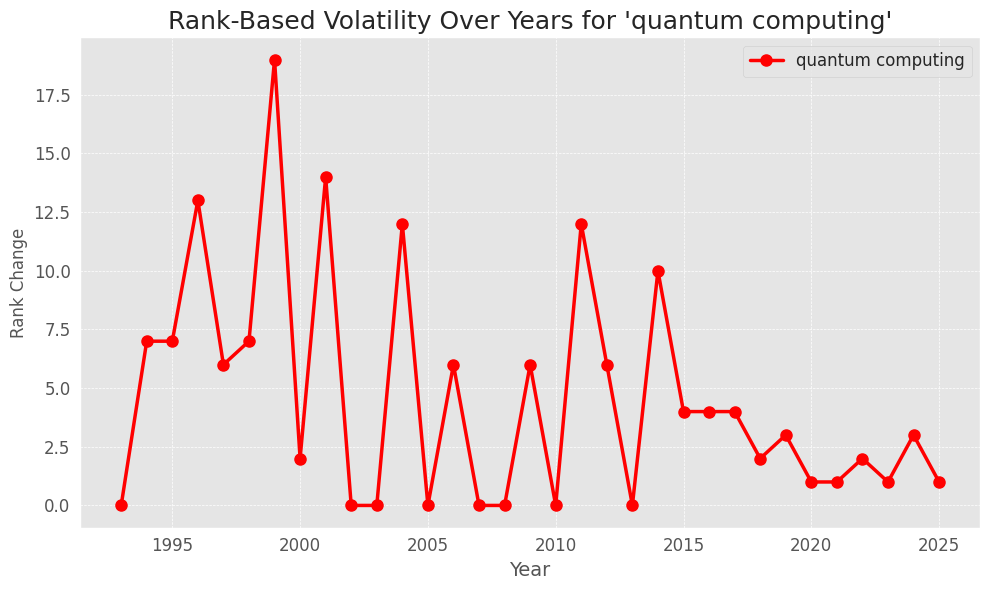

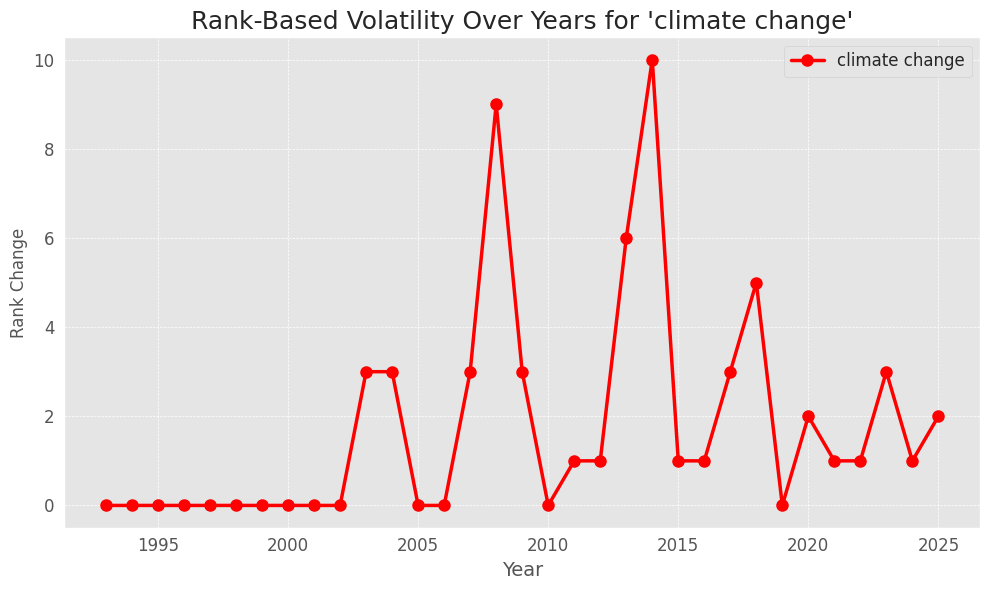

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

plt.style.use("ggplot")

for term in terms_of_interest:
    ranks = term_frequencies_df[term].rank(method="min", ascending=False)
    rank_diff = ranks.diff().abs()

    plt.figure(figsize=(10, 6))
    plt.plot(rank_diff.index, rank_diff.values,
             marker='o', markersize=8, linewidth=2.5,
             label=f"{term}", color='red')

    plt.title(f"Rank-Based Volatility Over Years for '{term}'", fontsize=18)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Rank Change", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend(fontsize=12, loc='upper right')
    plt.tight_layout()
    plt.show()

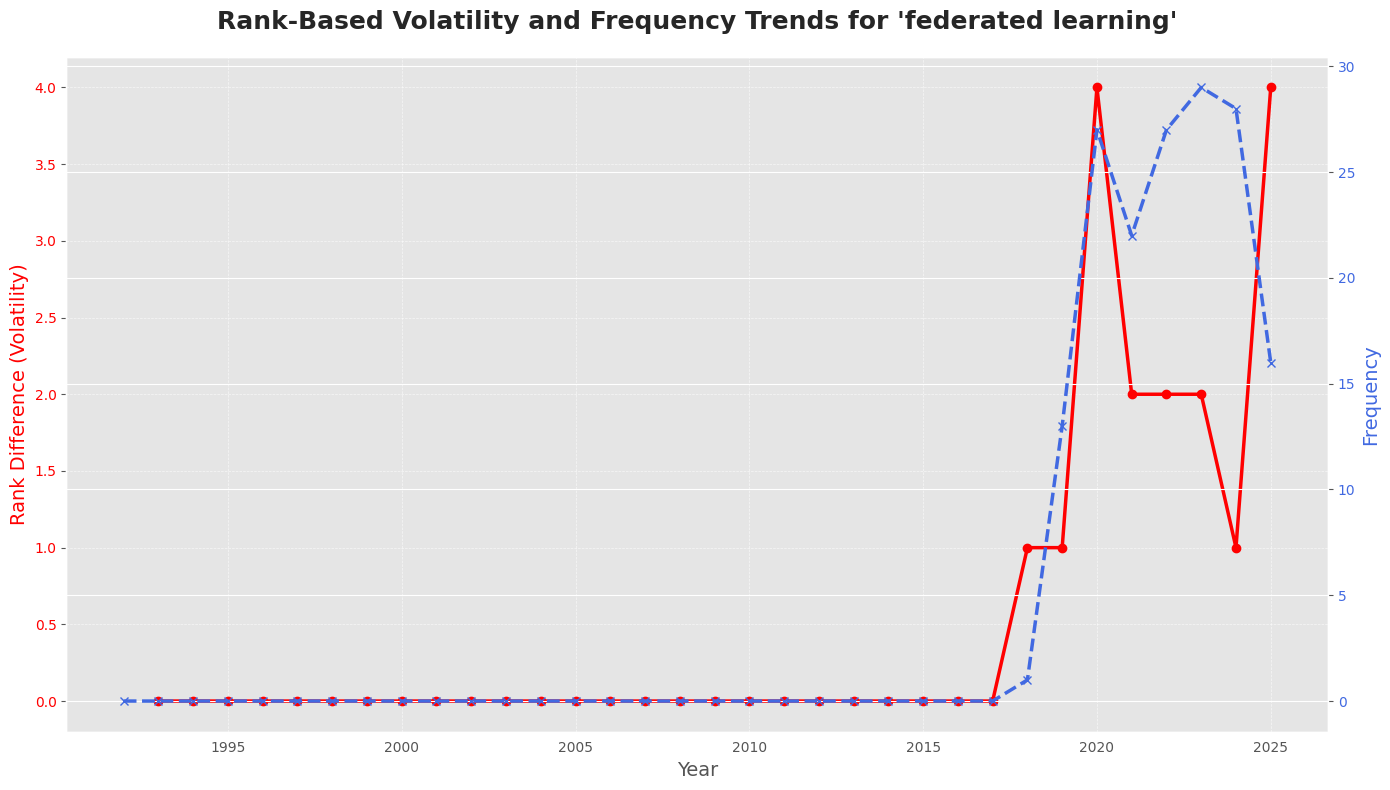

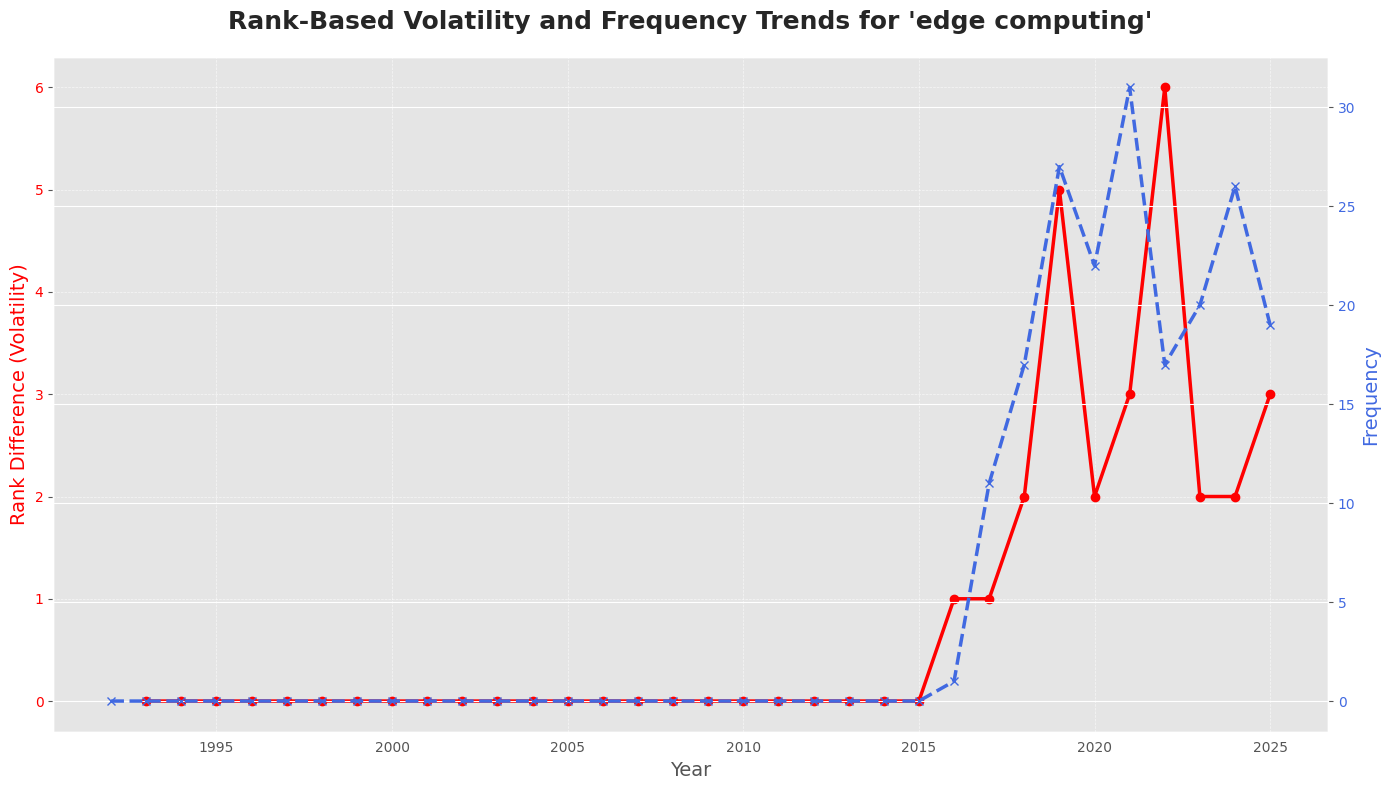

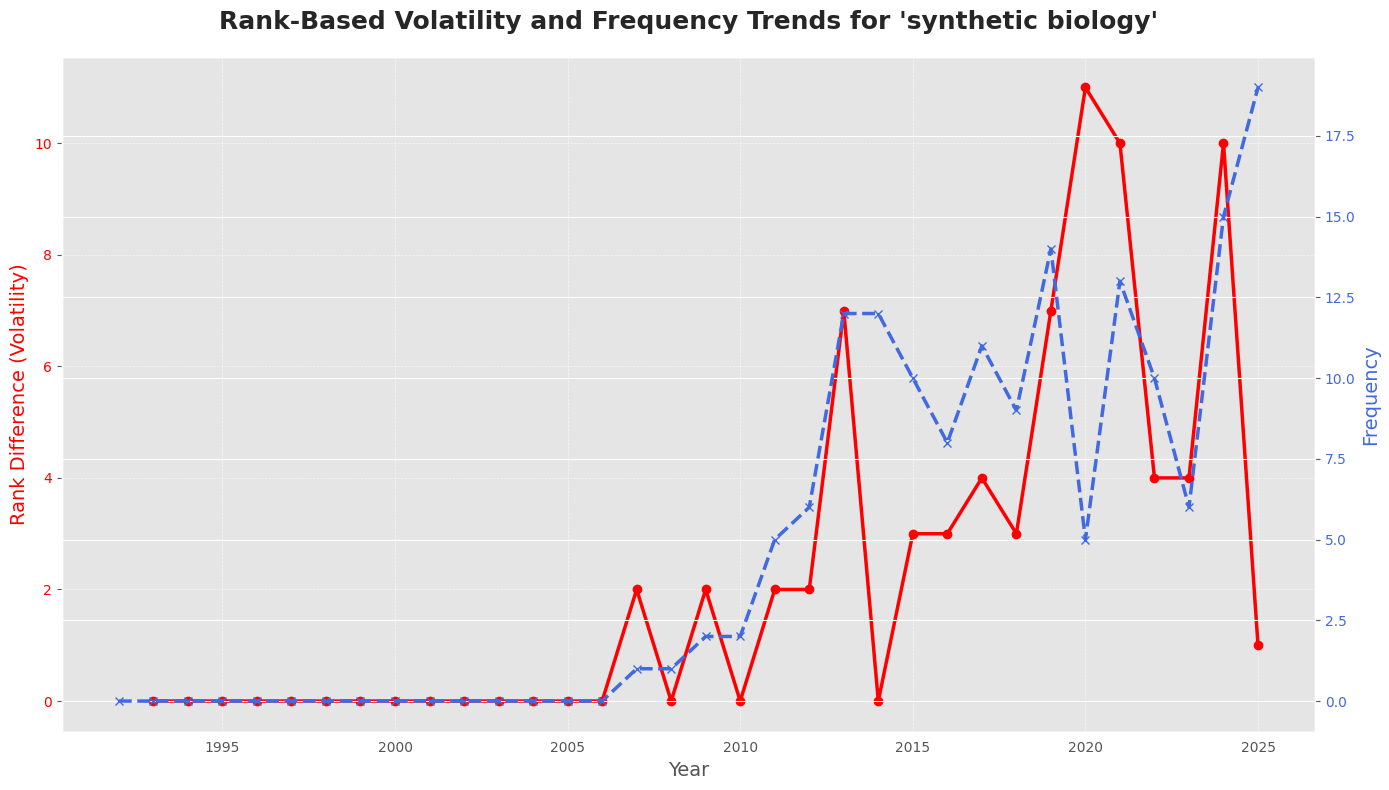

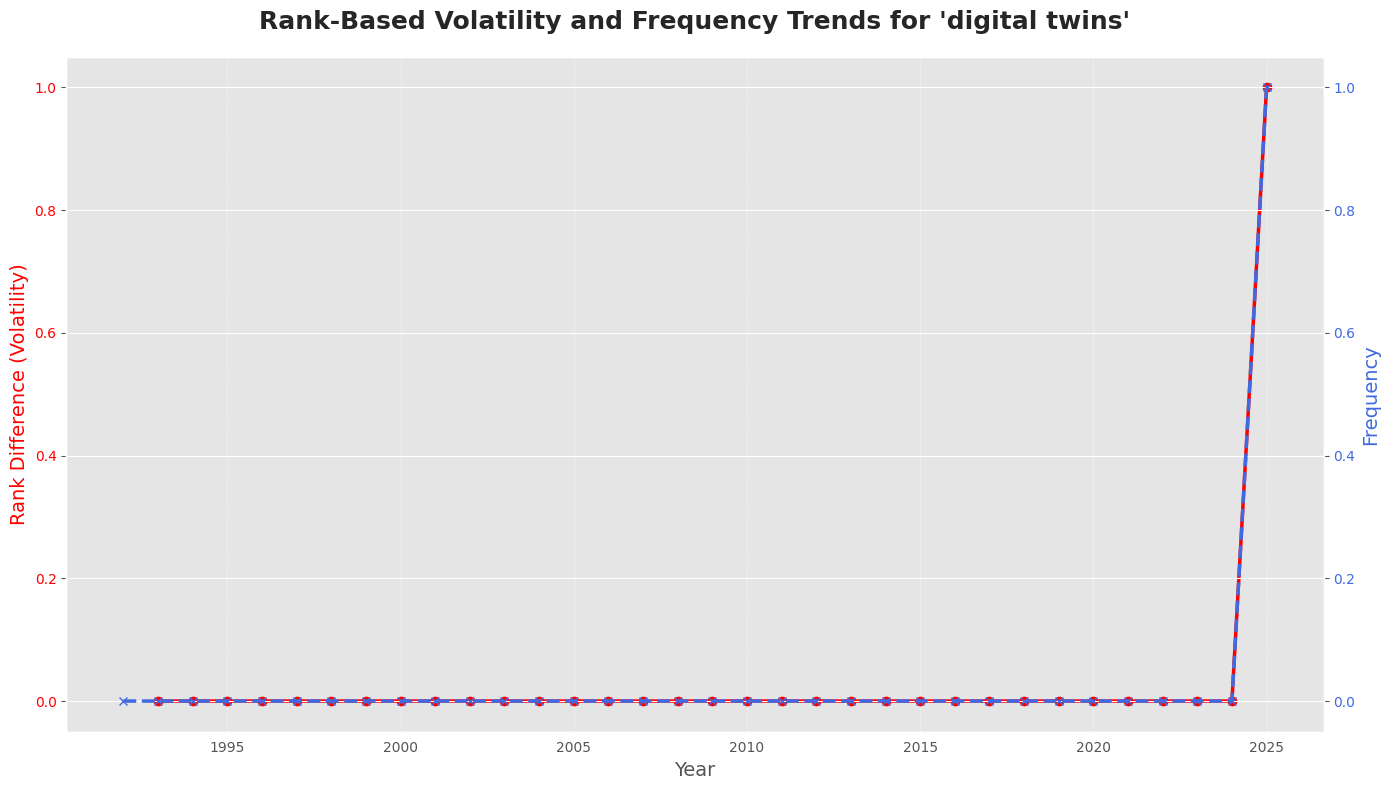

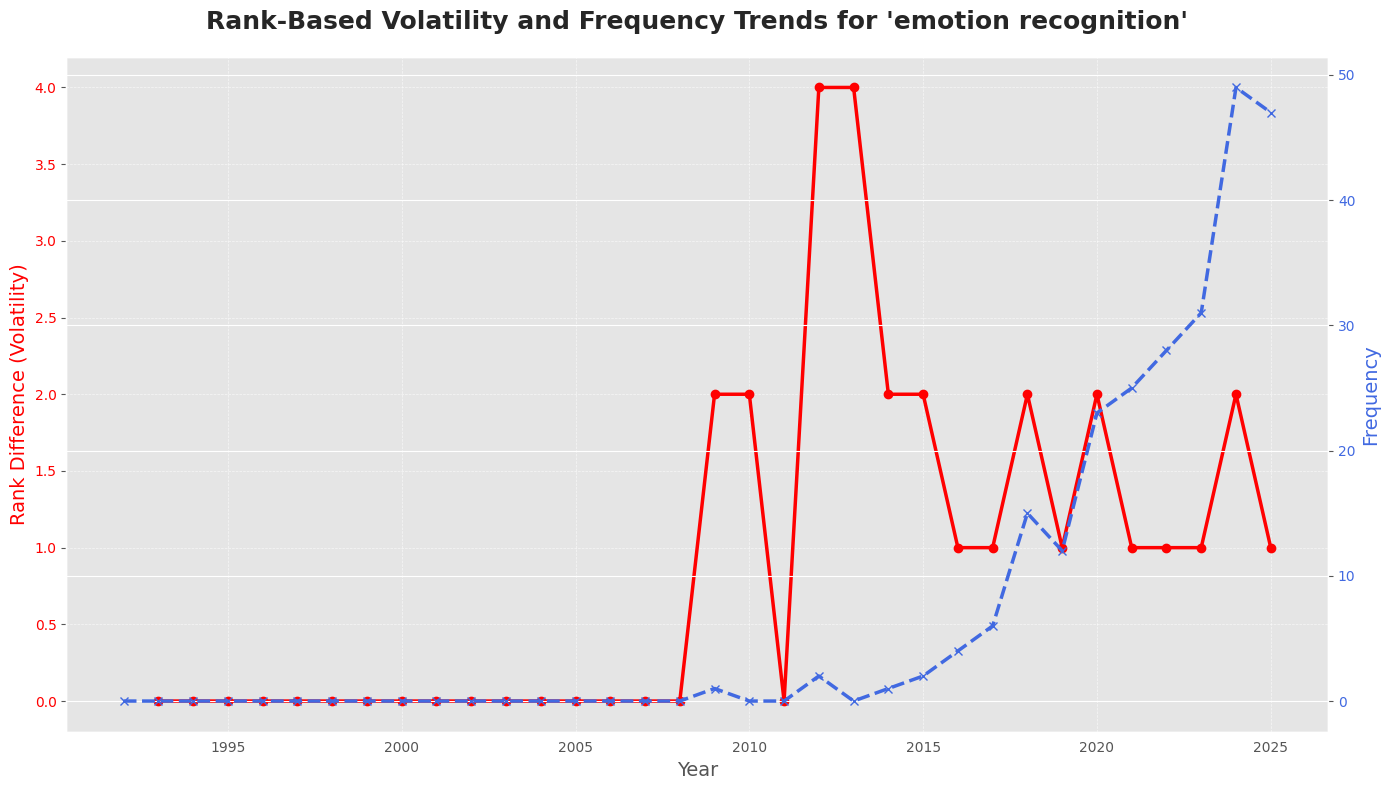

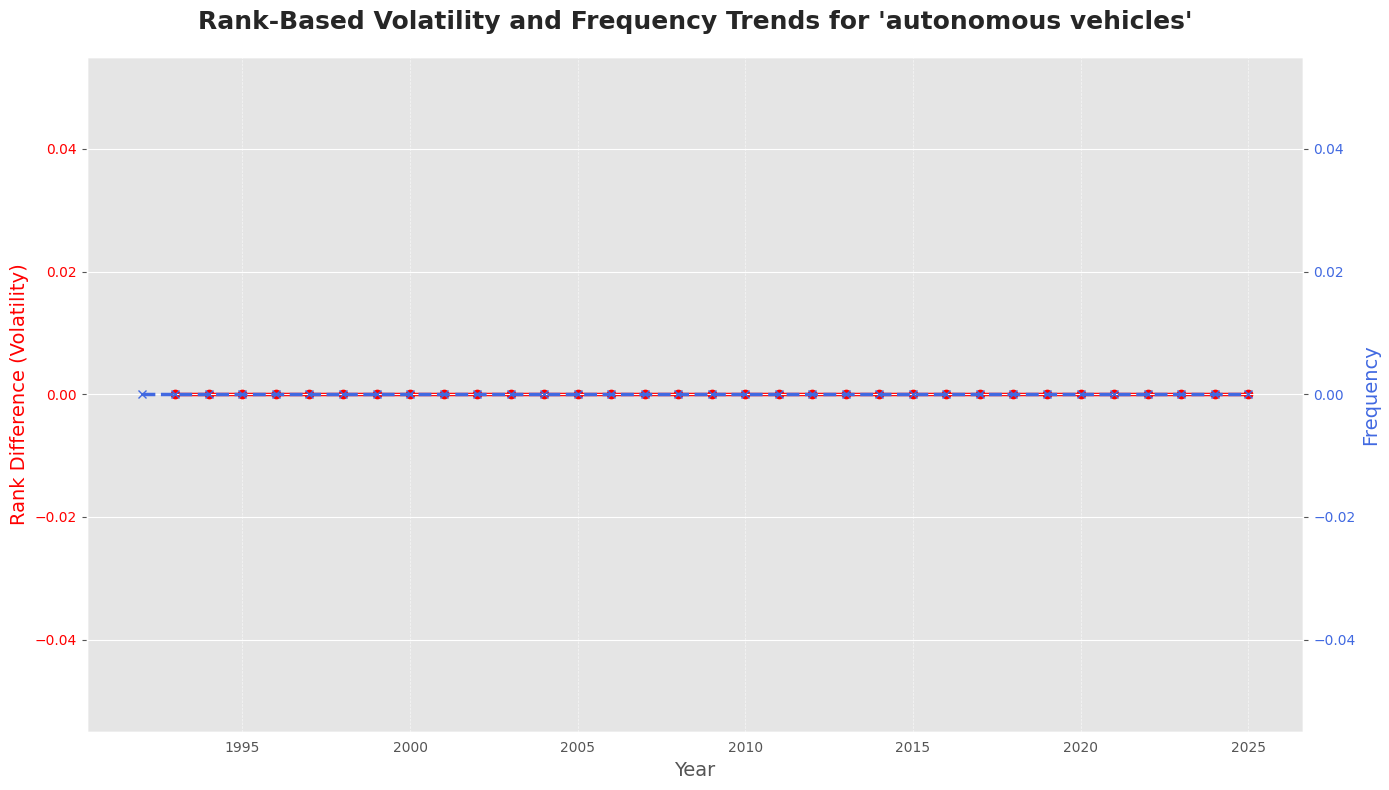

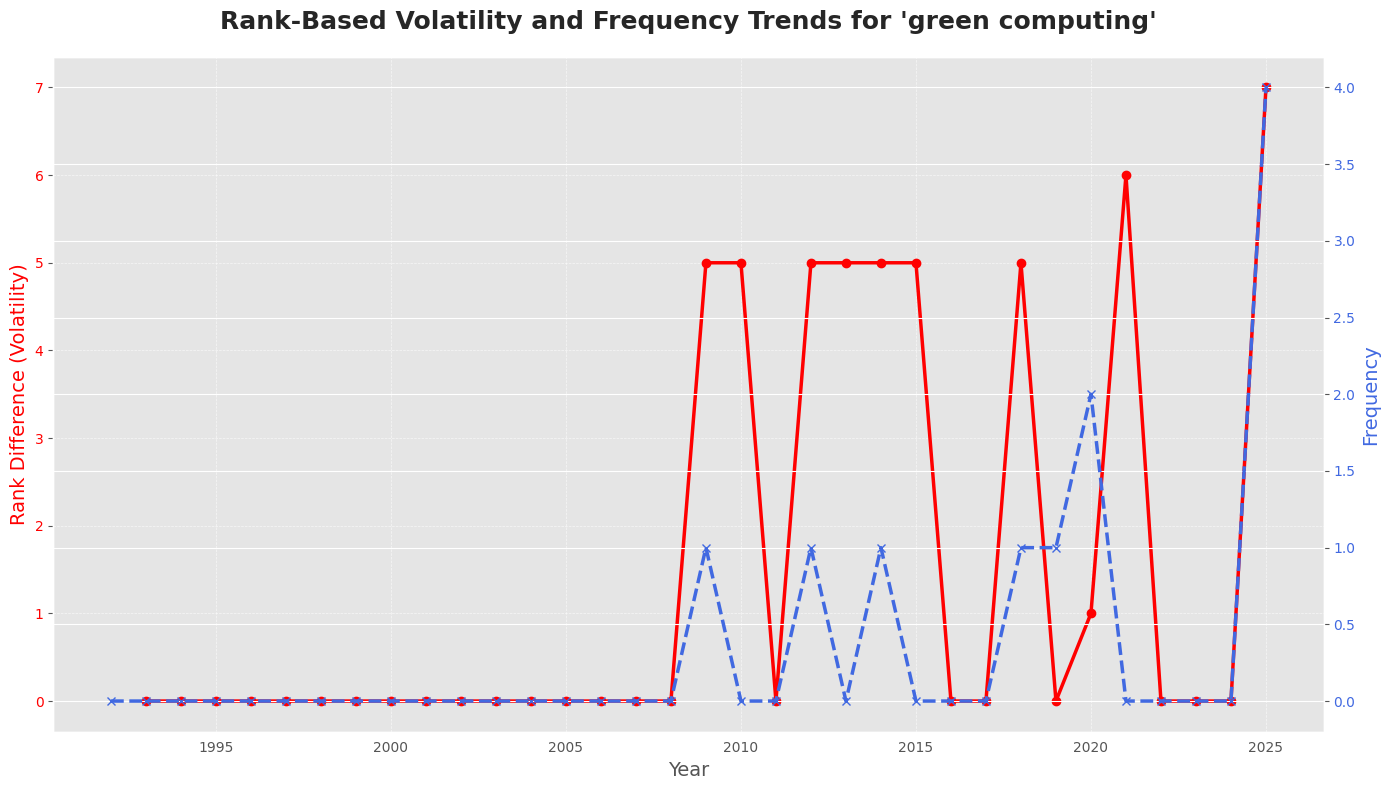

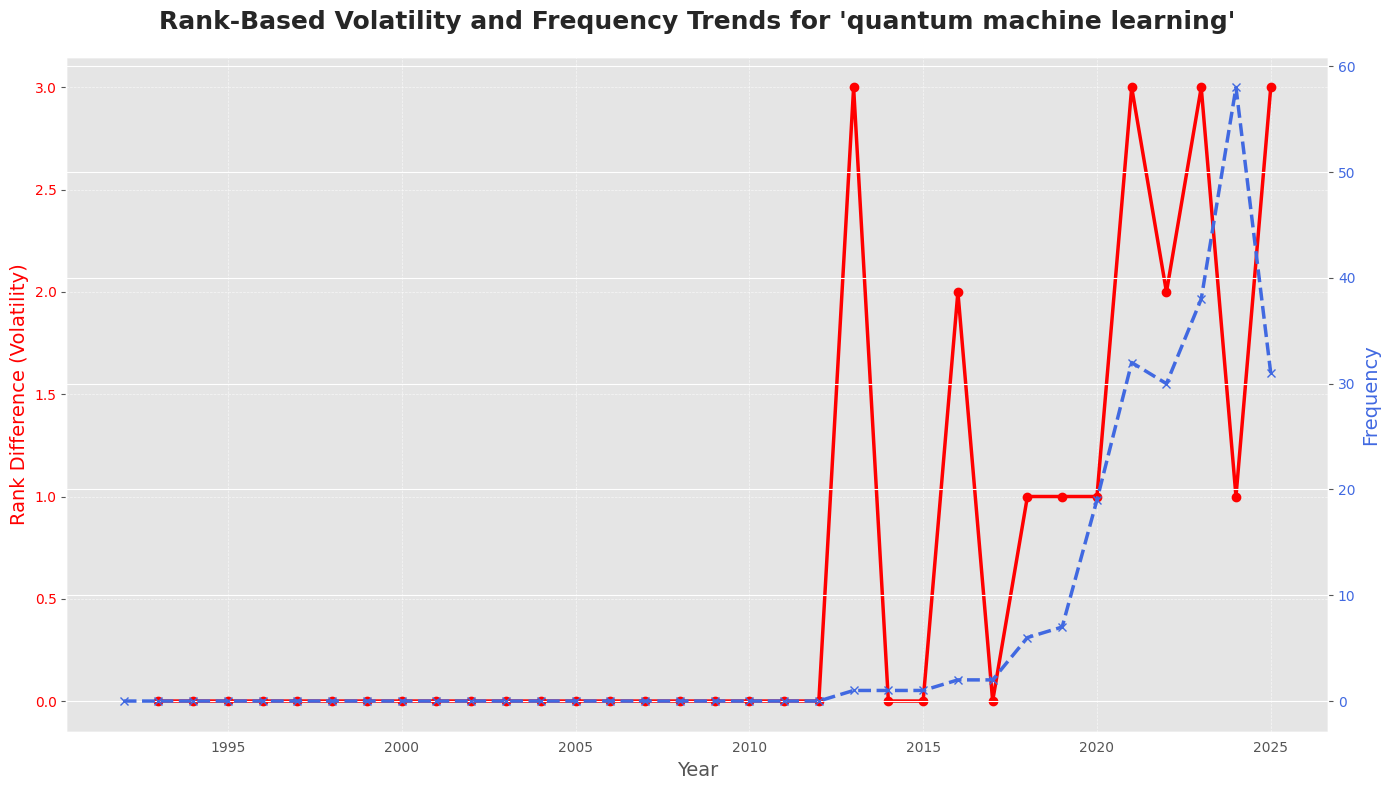

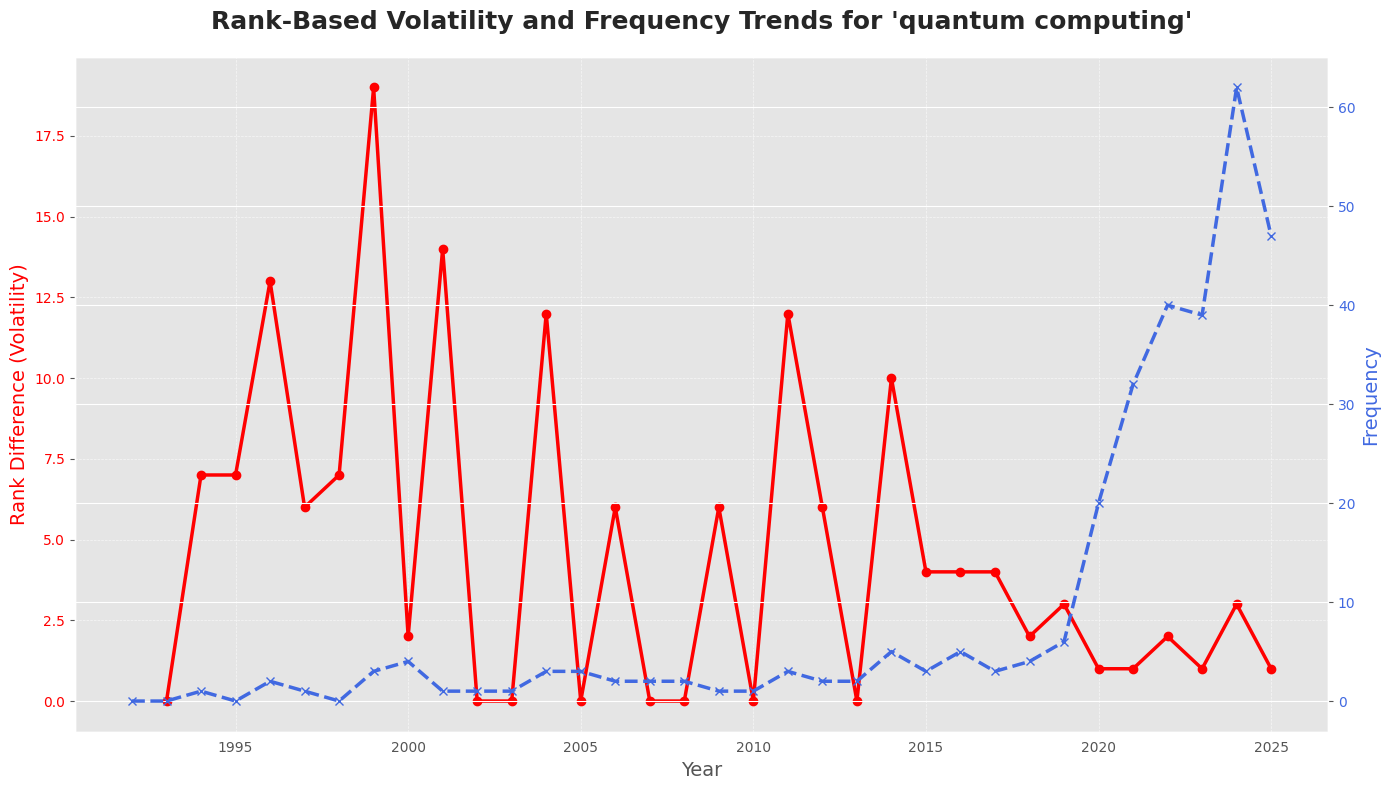

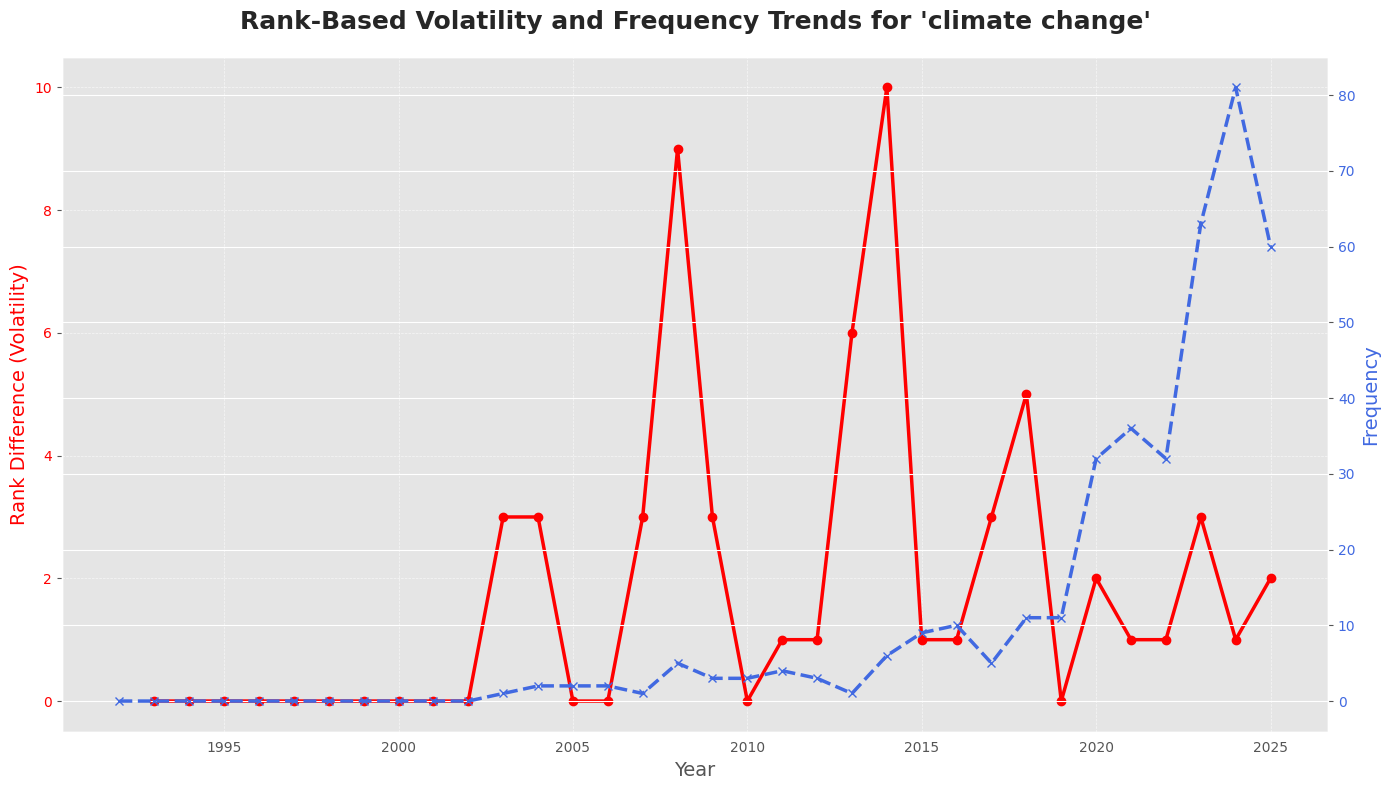

In [ ]:
import matplotlib.pyplot as plt

# Set style globally (safe style that works well and is widely available)
plt.style.use("ggplot")

def improved_plot_rank_based_volatility(term, term_frequencies_df):
    ranks = term_frequencies_df[term].rank(method="min", ascending=False)
    rank_diff = ranks.diff().abs()

    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Left y-axis: Volatility (Rank Difference)
    ax1.plot(
        rank_diff.index,
        rank_diff.values,
        marker='o',
        color='red',
        linewidth=2.5,
        label=f"{term} Volatility"
    )
    ax1.set_xlabel("Year", fontsize=14)
    ax1.set_ylabel("Rank Difference (Volatility)", fontsize=14, color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    # Right y-axis: Frequency
    ax2 = ax1.twinx()
    ax2.plot(
        term_frequencies_df[term].index,
        term_frequencies_df[term].values,
        marker='x',
        linestyle='--',
        color='royalblue',
        linewidth=2.5,
        label=f"{term} Frequency"
    )
    ax2.set_ylabel("Frequency", fontsize=14, color='royalblue')
    ax2.tick_params(axis='y', labelcolor='royalblue')



    # Title and layout
    plt.title(
        f"Rank-Based Volatility and Frequency Trends for '{term}'",
        fontsize=18,
        fontweight='bold',
        pad=20
    )

    plt.tight_layout()
    plt.show()

# Call the function for each term
for term in terms_of_interest:
    improved_plot_rank_based_volatility(term, term_frequencies_df)

In [ ]:
# Calculate percentile-based thresholds for frequency
frequency_percentile = term_frequencies_df.mean().quantile(0.2)  # Lower percentile for weak signal detection


weak_signals = []

for term in terms_of_interest:
    term_frequency = term_frequencies_df[term]
    ranks = term_frequency.rank(method="min", ascending=False)
    rank_diff = ranks.diff().abs()
    rank_based_volatility = rank_diff.mean()

    avg_frequency = term_frequency.mean()

    print(f"Term: {term}")
    print(f"  Average Frequency: {avg_frequency}")
    print(f"  Rank-Based Volatility: {rank_based_volatility}")

    # Detect weak signals based on adjusted criteria
    if rank_based_volatility > 2:
        weak_signals.append({
            "Term": term,
            "Average Frequency": avg_frequency,
            "Rank-Based Volatility": rank_based_volatility
        })

weak_signals_df = pd.DataFrame(weak_signals)

print("\nWeak Signals Detected:")
print(weak_signals_df)

Term: federated learning
  Average Frequency: 4.794117647058823
  Rank-Based Volatility: 0.5151515151515151
Term: edge computing
  Average Frequency: 5.617647058823529
  Rank-Based Volatility: 0.8181818181818182
Term: synthetic biology
  Average Frequency: 4.735294117647059
  Rank-Based Volatility: 2.272727272727273
Term: digital twins
  Average Frequency: 0.029411764705882353
  Rank-Based Volatility: 0.030303030303030304
Term: emotion recognition
  Average Frequency: 7.235294117647059
  Rank-Based Volatility: 0.8787878787878788
Term: autonomous vehicles
  Average Frequency: 0.0
  Rank-Based Volatility: 0.0
Term: green computing
  Average Frequency: 0.3235294117647059
  Rank-Based Volatility: 1.4848484848484849
Term: quantum machine learning
  Average Frequency: 6.705882352941177
  Rank-Based Volatility: 0.6060606060606061
Term: quantum computing
  Average Frequency: 8.852941176470589
  Rank-Based Volatility: 4.636363636363637
Term: climate change
  Average Frequency: 11.26470588235294

In [ ]:
print(weak_signals_df.columns)

Index(['Term', 'Average Frequency', 'Rank-Based Volatility'], dtype='object')


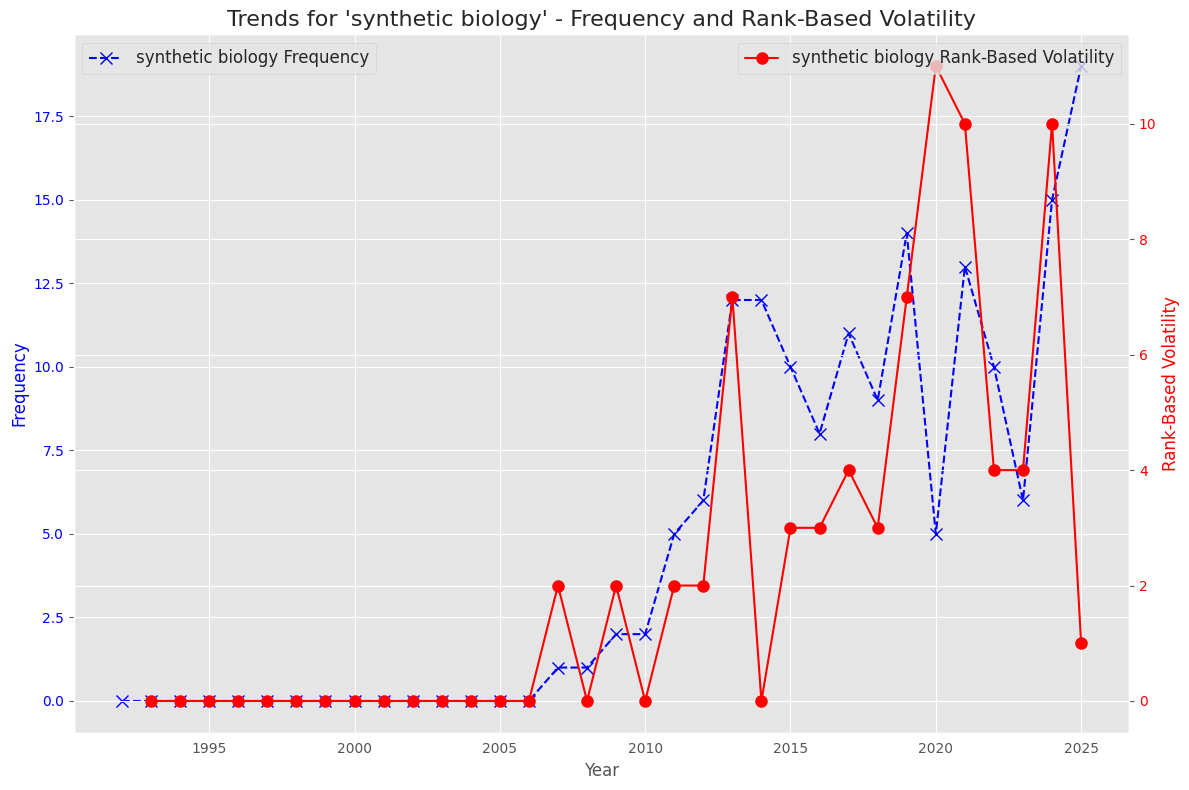

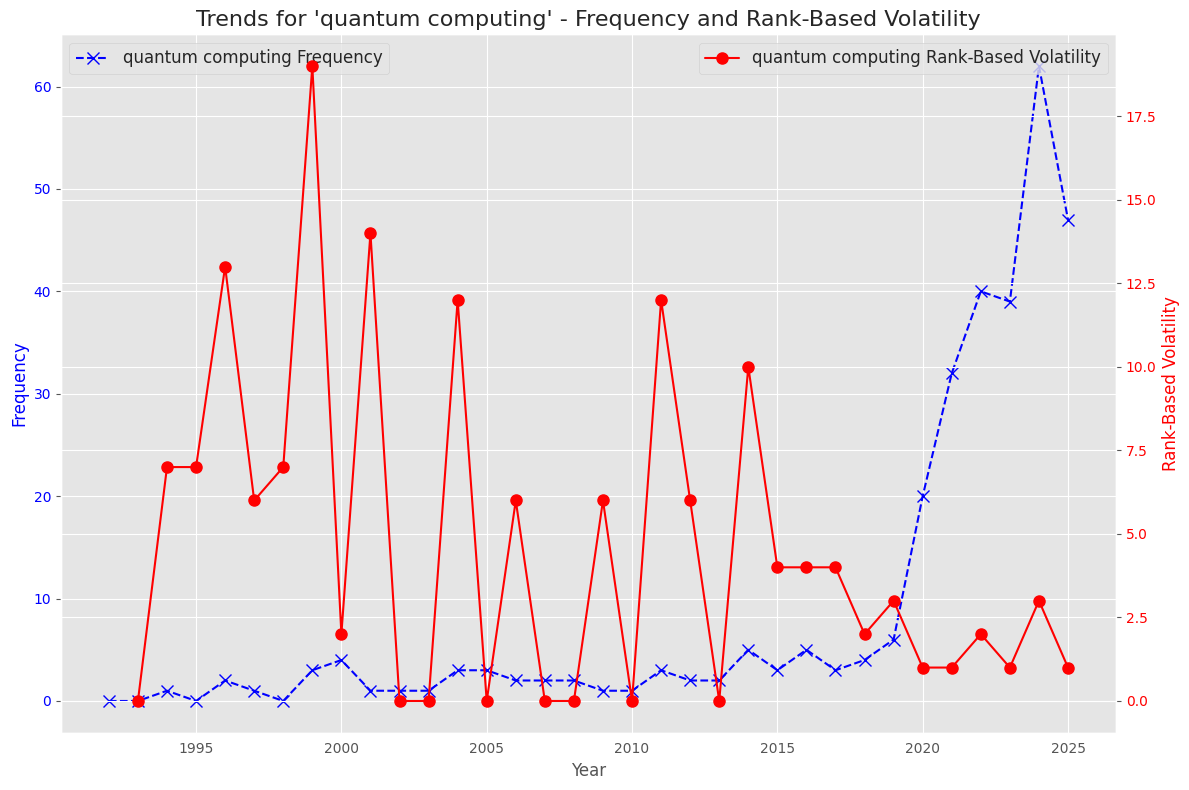

In [ ]:
import matplotlib.pyplot as plt

def plot_weak_signal_trends(weak_signals, term_frequencies_df):
    for term in weak_signals['Term']:
        term_data = term_frequencies_df[term]
        rank_volatility = term_data.rank(method="min", ascending=False).diff().abs()

        fig, ax1 = plt.subplots(figsize=(12, 8))


        ax1.plot(term_data.index, term_data.values, 'b--x', label=f"{term} Frequency", markersize=8)
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Frequency', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')


        ax2 = ax1.twinx()
        ax2.plot(rank_volatility.index, rank_volatility.values, 'r-o', label=f"{term} Rank-Based Volatility", markersize=8)
        ax2.set_ylabel('Rank-Based Volatility', color='red')
        ax2.tick_params(axis='y', labelcolor='red')


        plt.title(f"Trends for '{term}' - Frequency and Rank-Based Volatility", fontsize=16)
        ax1.grid(True)


        ax1.legend(loc='upper left', fontsize=12)
        ax2.legend(loc='upper right', fontsize=12)


        plt.tight_layout()
        plt.show()


plot_weak_signal_trends(weak_signals_df, term_frequencies_df)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


term = 'quantum computing'
data = term_frequencies_df[term].values
data = data.reshape(-1, 1)

scaler_freq = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler_freq.fit_transform(data)

# Prepare the data for LSTM
look_back = 5

def create_dataset(data, look_back=1):
    x, y = [], []
    for i in range(len(data) - look_back):
        x.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(x), np.array(y)

x_data, y_data = create_dataset(scaled_data, look_back)


x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
def create_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=(x_data.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the model
model = create_model()
model.fit(x_data, y_data, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0976
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0930
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0886
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0845
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0806
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0769
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0734
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0701
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0670
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0642
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0615
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0590
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0567
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0545
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0526
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Function to make future predictions
def predict_future(model, data, look_back, steps=5):
    predictions = []
    last_data = data[-look_back:].reshape(1, look_back, 1)  # Get the last 5 data points

    for _ in range(steps):
        pred = model.predict(last_data)
        predictions.append(pred[0][0])
        last_data = np.roll(last_data, -1, axis=1)  # Shift the data
        last_data[0, -1, 0] = pred  # Add the new prediction

    return np.array(predictions)

# Make predictions for the next 5 years
future_freq = predict_future(model, scaled_data, look_back, steps=5)

# Inverse transform the predictions to get the original scale
future_freq = scaler_freq.inverse_transform(future_freq.reshape(-1, 1))

# Print the future frequency predictions
print("Predicted Frequencies for next 5 years:")
for year, freq in zip(range(2025, 2030), future_freq.flatten()):
    print(f"Year {year}: Predicted Frequency: {freq:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


/tmp/ipython-input-168140393.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Frequencies for next 5 years:
Year 2025: Predicted Frequency: 64.97
Year 2026: Predicted Frequency: 75.13
Year 2027: Predicted Frequency: 85.50
Year 2028: Predicted Frequency: 100.48
Year 2029: Predicted Frequency: 109.81


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Predicted Frequencies for 'federated learning' for the next 5 years:
Year 2025: Predicted Frequency: 37.99
Year 2026: Predicted Frequency: 40.76
Year 2027: Predicted Frequency: 43.44
Year 2028: Predicted Frequency: 47.10
Year 2029: Predicted Frequency: 53.05


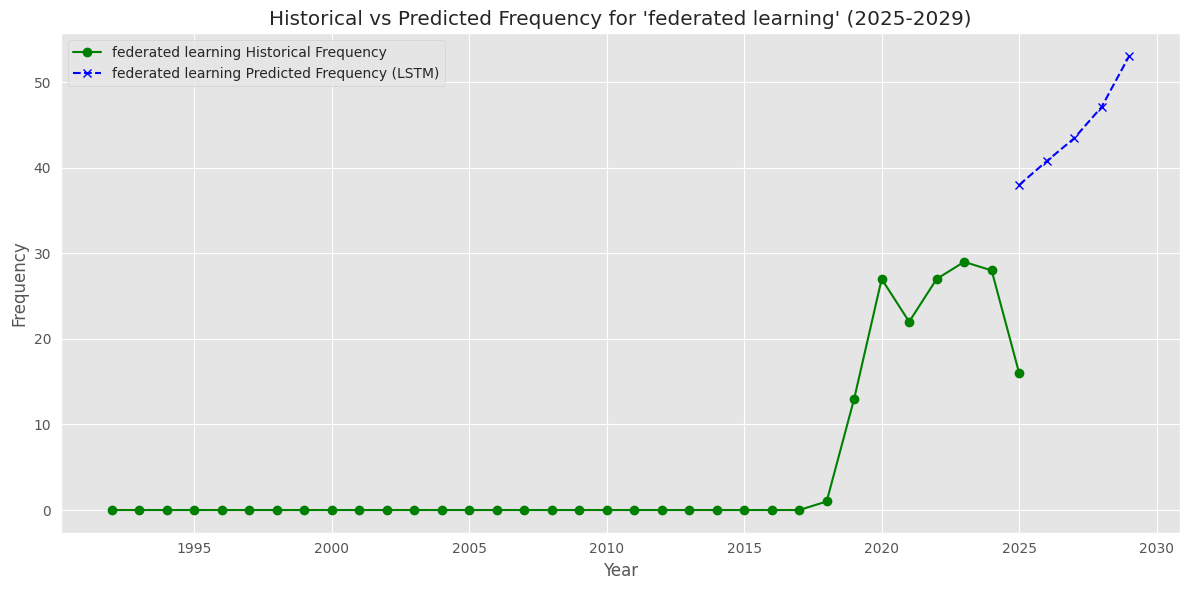

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Predicted Frequencies for 'edge computing' for the next 5 years:
Year 2025: Predicted Frequency: 34.77
Year 2026: Predicted Frequency: 33.26
Year 2027: Predicted Frequency: 38.13
Year 2028: Predicted Frequency: 43.49
Year 2029: Predicted Frequency: 48.40


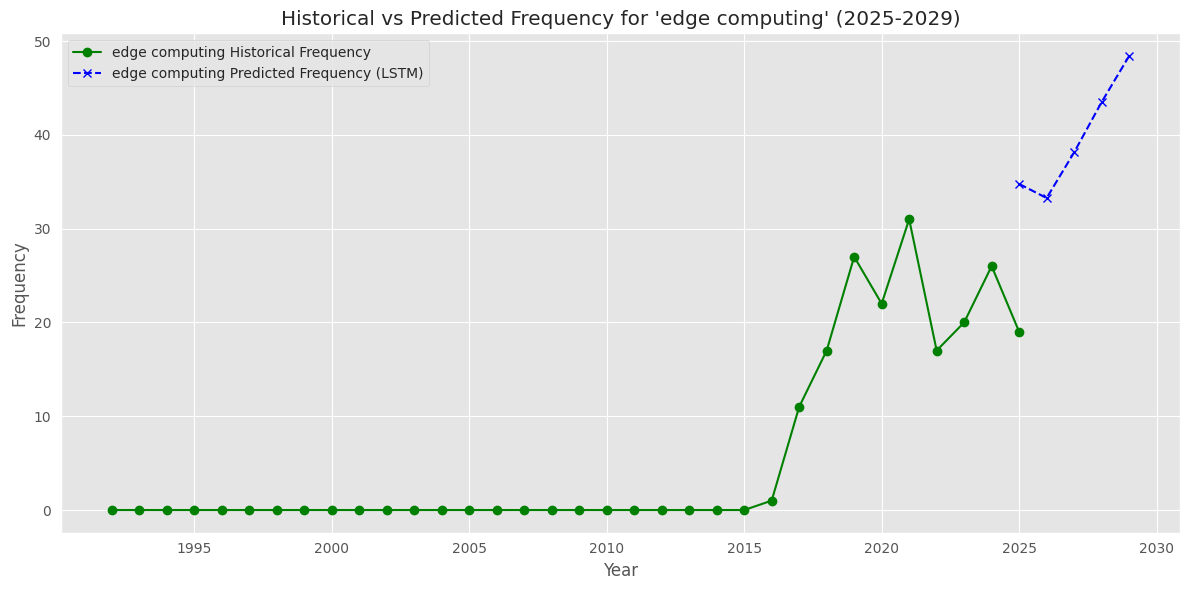

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

Predicted Frequencies for 'synthetic biology' for the next 5 years:
Year 2025: Predicted Frequency: 18.84
Year 2026: Predicted Frequency: 20.12
Year 2027: Predicted Frequency: 23.09
Year 2028: Predicted Frequency: 28.35
Year 2029: Predicted Frequency: 31.73


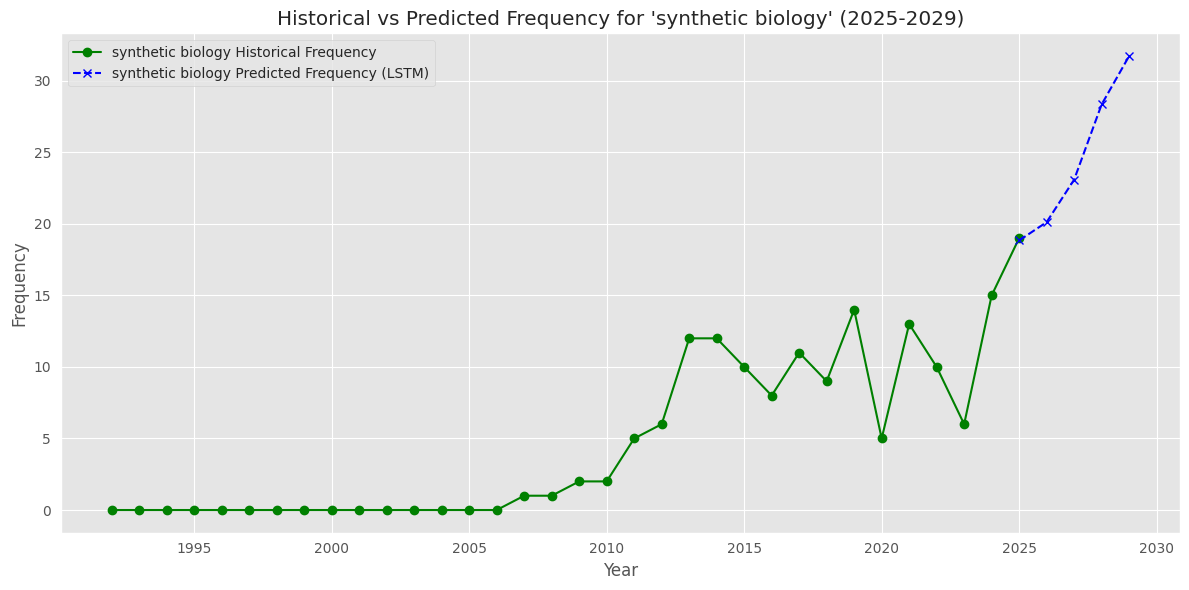

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Predicted Frequencies for 'digital twins' for the next 5 years:
Year 2025: Predicted Frequency: 4.14
Year 2026: Predicted Frequency: 4.78
Year 2027: Predicted Frequency: 5.80
Year 2028: Predicted Frequency: 7.20
Year 2029: Predicted Frequency: 9.02


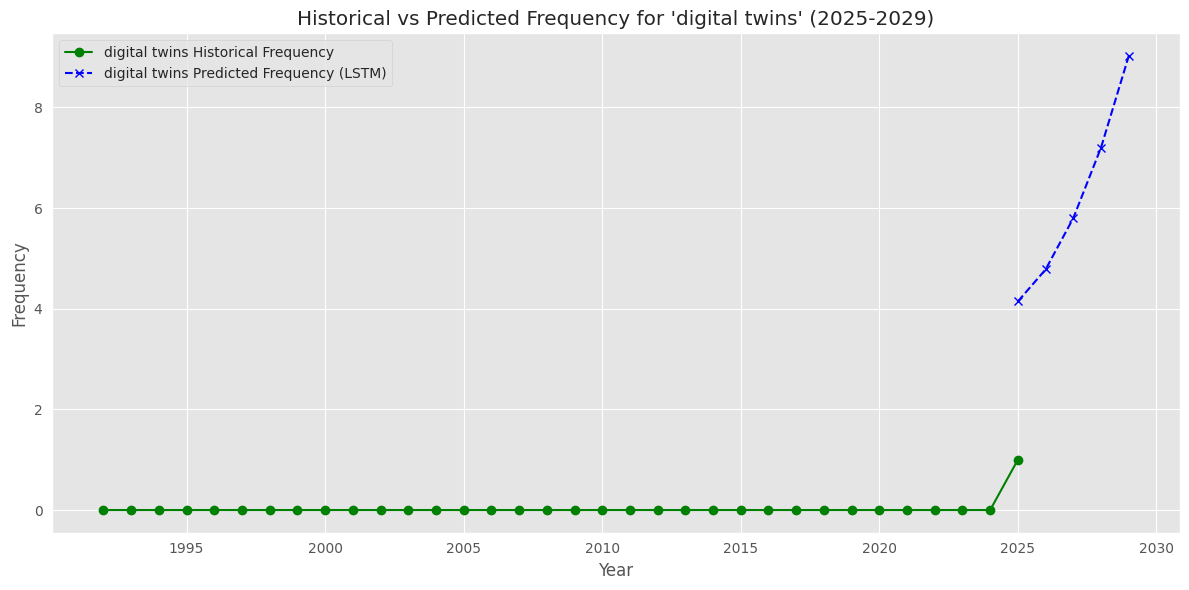

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

Predicted Frequencies for 'emotion recognition' for the next 5 years:
Year 2025: Predicted Frequency: 50.93
Year 2026: Predicted Frequency: 59.73
Year 2027: Predicted Frequency: 70.16
Year 2028: Predicted Frequency: 82.87
Year 2029: Predicted Frequency: 91.71


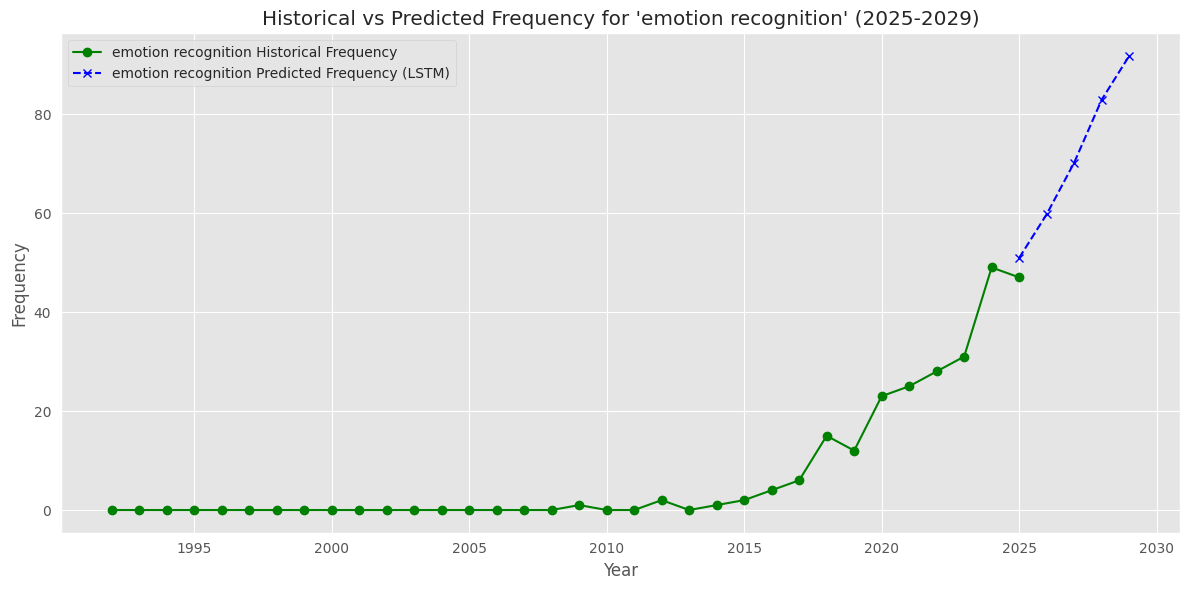

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Predicted Frequencies for 'autonomous vehicles' for the next 5 years:
Year 2025: Predicted Frequency: 4.01
Year 2026: Predicted Frequency: 4.55
Year 2027: Predicted Frequency: 5.48
Year 2028: Predicted Frequency: 6.78
Year 2029: Predicted Frequency: 8.48


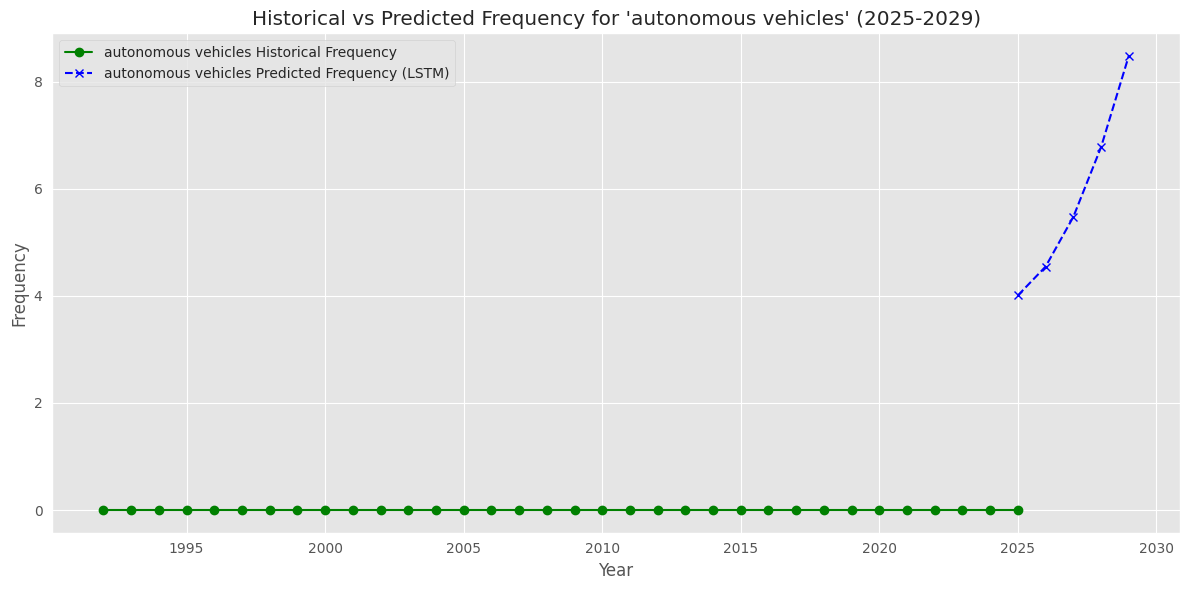

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Predicted Frequencies for 'green computing' for the next 5 years:
Year 2025: Predicted Frequency: 4.55
Year 2026: Predicted Frequency: 5.47
Year 2027: Predicted Frequency: 6.78
Year 2028: Predicted Frequency: 8.48
Year 2029: Predicted Frequency: 10.65


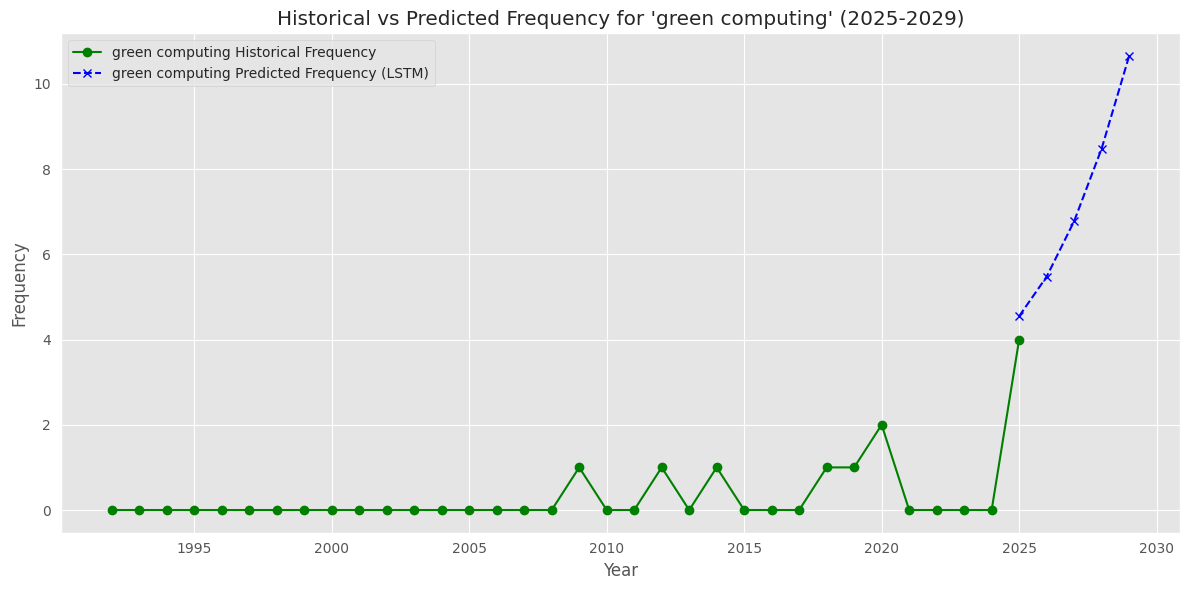

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Predicted Frequencies for 'quantum machine learning' for the next 5 years:
Year 2025: Predicted Frequency: 56.79
Year 2026: Predicted Frequency: 63.11
Year 2027: Predicted Frequency: 73.32
Year 2028: Predicted Frequency: 83.71
Year 2029: Predicted Frequency: 89.21


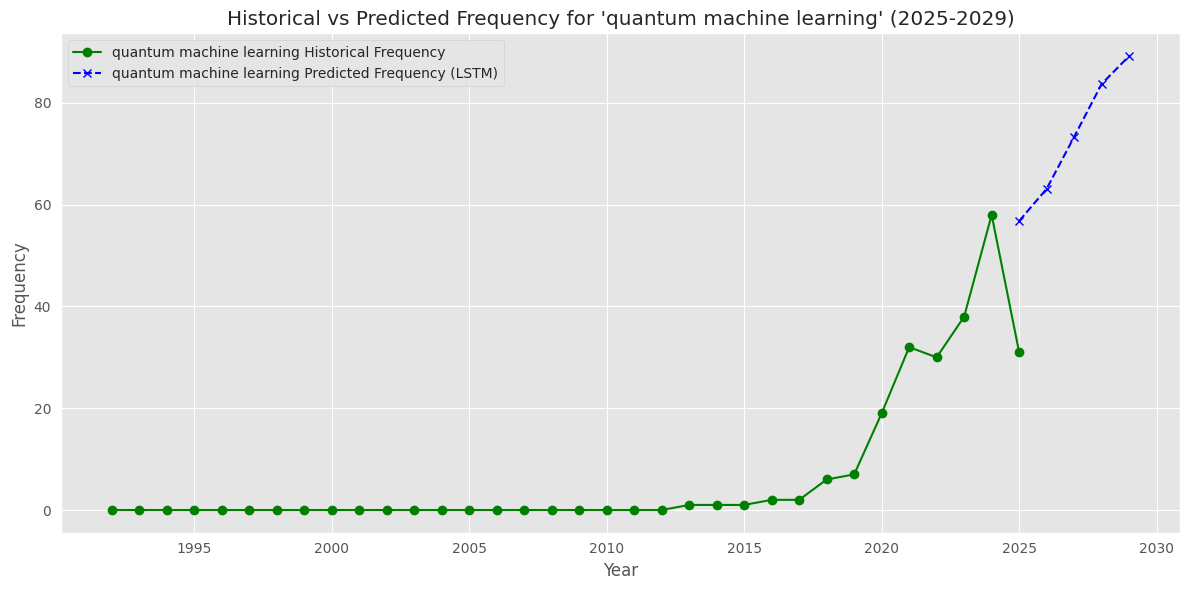

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Predicted Frequencies for 'climate change' for the next 5 years:
Year 2025: Predicted Frequency: 79.33
Year 2026: Predicted Frequency: 94.33
Year 2027: Predicted Frequency: 115.93
Year 2028: Predicted Frequency: 128.83
Year 2029: Predicted Frequency: 138.87


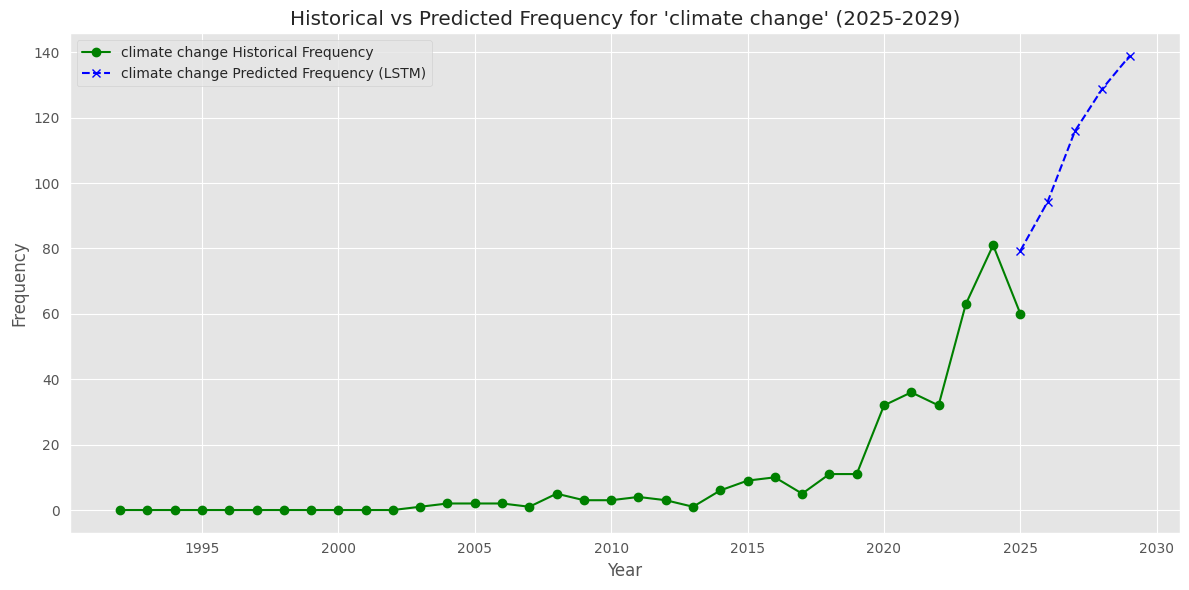

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/tmp/ipython-input-3385557537.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Predicted Frequencies for 'quantum computing' for the next 5 years:
Year 2025: Predicted Frequency: 64.97
Year 2026: Predicted Frequency: 75.13
Year 2027: Predicted Frequency: 85.50
Year 2028: Predicted Frequency: 100.48
Year 2029: Predicted Frequency: 109.81


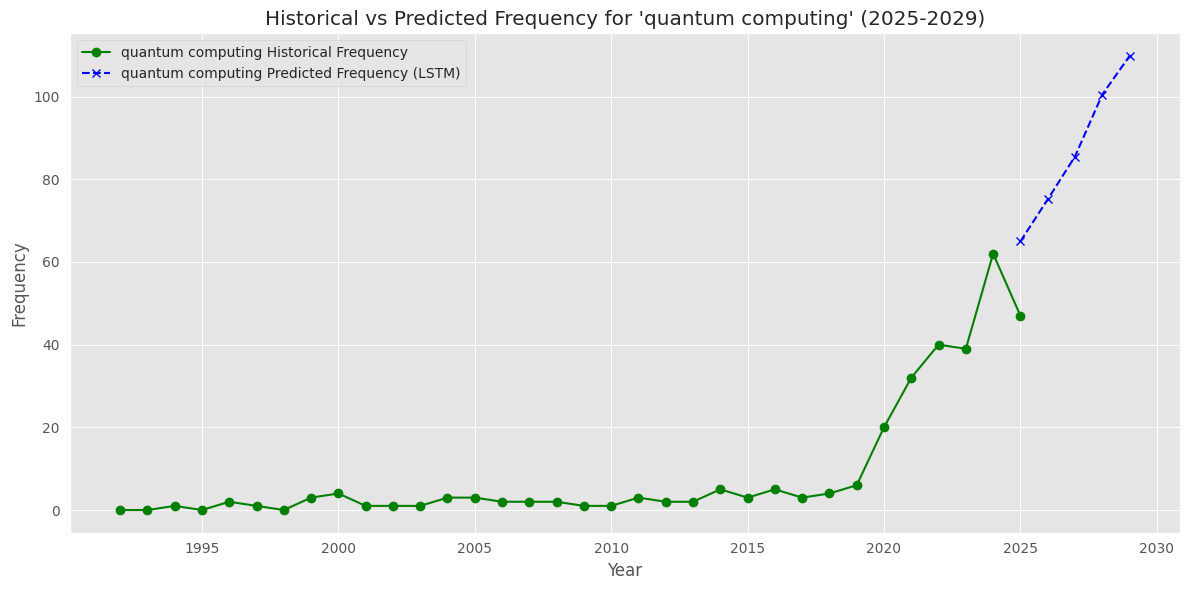

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to make future predictions
def predict_future(model, data, look_back, steps=5):
    predictions = []
    last_data = data[-look_back:].reshape(1, look_back, 1)  # Get the last 'look_back' data points

    for _ in range(steps):
        pred = model.predict(last_data)
        predictions.append(pred[0][0])
        last_data = np.roll(last_data, -1, axis=1)  # Shift the data
        last_data[0, -1, 0] = pred  # Add the new prediction

    return np.array(predictions)

# Function to display the predictions for each term
def display_predictions_for_all_terms(terms_of_interest, term_frequencies_df, model, scaler_freq, look_back=5, steps=5):
    # Filter out terms not present in term_frequencies_df
    valid_terms = [term for term in terms_of_interest if term in term_frequencies_df.columns]

    for term in valid_terms:

        historical_data = term_frequencies_df[term].values


        scaled_data = scaler_freq.transform(historical_data.reshape(-1, 1))


        future_freq = predict_future(model, scaled_data, look_back, steps=steps)

        future_freq = scaler_freq.inverse_transform(future_freq.reshape(-1, 1))


        print(f"\nPredicted Frequencies for '{term}' for the next 5 years:")
        for year, freq in zip(range(2025, 2030), future_freq.flatten()):
            print(f"Year {year}: Predicted Frequency: {freq:.2f}")

        # Plotting the results
        plt.figure(figsize=(12, 6))
        plt.plot(term_frequencies_df[term].index, term_frequencies_df[term].values, label=f'{term} Historical Frequency', color='green', marker='o')
        plt.plot(range(2025, 2030), future_freq.flatten(), linestyle='--', color='blue', marker='x', label=f'{term} Predicted Frequency (LSTM)')
        plt.title(f"Historical vs Predicted Frequency for '{term}' (2025-2029)")
        plt.xlabel('Year')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

# List of terms to predict
terms_of_interest = [
   "graph neural networks",
    "explainable AI",
    "federated learning",
    "edge computing",
    "synthetic biology",
    "digital twins",
    "biomedical informatics",
    "CRISPR gene editing",
    "blockchain in healthcare",
    "emotion recognition",
    "autonomous vehicles",
    "green computing",
    "AI ethics in medicine",
    "AI in education",
    "quantum machine learning",
    "computational sustainability",
    "climate change",
    "quantum computing"
]


display_predictions_for_all_terms(terms_of_interest, term_frequencies_df, model, scaler_freq, look_back=5, steps=5)


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def preprocess_volatility_for_lstm(df, term, look_back=5):
    # Use the rank-based volatility data for the term
    volatility_data = df[term].rank(method="min", ascending=False).diff().abs().values
    volatility_data = volatility_data.reshape(-1, 1)

    # Scale the volatility data
    scaler_vol = MinMaxScaler(feature_range=(0, 1))
    scaled_volatility = scaler_vol.fit_transform(volatility_data)


    x_data_vol = []
    y_data_vol = []

    for i in range(look_back, len(scaled_volatility)):
        x_data_vol.append(scaled_volatility[i-look_back:i, 0])  # Previous 'look_back' values
        y_data_vol.append(scaled_volatility[i, 0])  # Next value to predict

    x_data_vol = np.array(x_data_vol)
    y_data_vol = np.array(y_data_vol)

    x_data_vol = np.reshape(x_data_vol, (x_data_vol.shape[0], x_data_vol.shape[1], 1))

    return x_data_vol, y_data_vol, scaler_vol

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


term = 'synthetic biology'
x_data_vol, y_data_vol, scaler_vol = preprocess_volatility_for_lstm(term_frequencies_df, term)

# Create and train the LSTM model
model_vol = create_lstm_model(input_shape=(x_data_vol.shape[1], 1))
model_vol.fit(x_data_vol, y_data_vol, epochs=50, batch_size=32)

# Save the trained model
model_vol.save(f"{term}_rank_based_volatility_lstm_model.h5")

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: nan
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: nan
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: nan
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: nan
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: nan
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: nan
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: nan
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: nan
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: nan
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: nan
Epoch 17/50
1/1 ━━━

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


def create_dataset(data, look_back=1):
    x, y = [], []
    for i in range(len(data) - look_back):
        x.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(x), np.array(y)


terms_of_interest = [
   "graph neural networks",
    "explainable AI",
    "federated learning",
    "edge computing",
    "synthetic biology",
    "digital twins",
    "biomedical informatics",
    "CRISPR gene editing",
    "blockchain in healthcare",
    "emotion recognition",
    "autonomous vehicles",
    "green computing",
    "AI ethics in medicine",
    "AI in education",
    "quantum machine learning",
    "computational sustainability",
    "climate change",
    "quantum computing"
]


scaler_vol = MinMaxScaler(feature_range=(0, 1))

x_data_all = {}
y_data_all = {}
models = {}


look_back = 5
valid_terms = [term for term in terms_of_interest if term in term_frequencies_df.columns]
for term in valid_terms:

    volatility_data = term_frequencies_df[term].rank(method="min", ascending=False).diff().abs()


    volatility_data = volatility_data.dropna().values.reshape(-1, 1)


    scaled_volatility = scaler_vol.fit_transform(volatility_data)

    # Prepare the dataset for LSTM
    x_data, y_data = create_dataset(scaled_volatility, look_back)


    x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))


    x_data_all[term] = x_data
    y_data_all[term] = y_data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create and train the LSTM model
def create_and_train_lstm(x_data, y_data, epochs=50, batch_size=8):
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=(x_data.shape[1], 1)))  # LSTM layer
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_data, y_data, epochs=epochs, batch_size=batch_size, verbose=0)

    return model
valid_terms = [term for term in terms_of_interest if term in term_frequencies_df.columns]
# Train the LSTM model for each term and store the models
for term in valid_terms:
    print(f"Training LSTM model for {term}...")
    model = create_and_train_lstm(x_data_all[term], y_data_all[term])
    models[term] = model

Training LSTM model for federated learning...
Training LSTM model for edge computing...
Training LSTM model for synthetic biology...
Training LSTM model for digital twins...
Training LSTM model for emotion recognition...
Training LSTM model for autonomous vehicles...
Training LSTM model for green computing...
Training LSTM model for quantum machine learning...
Training LSTM model for climate change...
Training LSTM model for quantum computing...


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

def create_dataset(data, look_back=1):
    x, y = [], []
    for i in range(len(data) - look_back):
        x.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(x), np.array(y)

terms_of_interest = [
    "graph neural networks", "explainable AI", "federated learning", "edge computing",
    "synthetic biology", "digital twins", "biomedical informatics", "CRISPR gene editing",
    "blockchain in healthcare", "emotion recognition", "autonomous vehicles", "green computing",
    "AI ethics in medicine", "AI in education", "quantum machine learning",
    "computational sustainability", "climate change", "quantum computing"
]

scaler_vol = MinMaxScaler(feature_range=(0, 1))
look_back = 5

# Store features for clustering
feature_vectors = []
term_labels = []

valid_terms = [term for term in terms_of_interest if term in term_frequencies_df.columns]

for term in valid_terms:
    # Calculate volatility
    volatility_data = term_frequencies_df[term].rank(method="min", ascending=False).diff().abs().dropna().values.reshape(-1, 1)

    # Normalize
    scaled_volatility = scaler_vol.fit_transform(volatility_data)

    # Extract basic features: mean, std, and trend
    mean_vol = np.mean(scaled_volatility)
    std_vol = np.std(scaled_volatility)
    trend_vol = np.polyfit(range(len(scaled_volatility)), scaled_volatility.flatten(), 1)[0]  # slope

    feature_vectors.append([mean_vol, std_vol, trend_vol])
    term_labels.append(term)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(feature_vectors)

# Create a DataFrame for visualization
cluster_df = pd.DataFrame({
    'Term': term_labels,
    'Cluster': clusters
})

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))  # Output layer with a single neuron
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


models = {}
valid_terms = [term for term in terms_of_interest if term in term_frequencies_df.columns]
for term in valid_terms:
    print(f"Training model for {term}...")

    # Build LSTM model
    model = build_lstm_model((x_data_all[term].shape[1], 1))

    # Train the model
    model.fit(x_data_all[term], y_data_all[term], epochs=100, batch_size=16, verbose=1)

    # Store the trained model
    models[term] = model

# Once training is complete, you can print the models or check their summary
for term in models:
    print(f"Model trained for {term}")
    models[term].summary()

Training model for federated learning...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.1173
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1039
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1108
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0658
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0726
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0798
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0729
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0633
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0756
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0726
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0537
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0591
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0497
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0625
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29m

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for edge computing


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for synthetic biology


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for digital twins


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for emotion recognition


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for autonomous vehicles


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for green computing


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for quantum machine learning


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for climate change


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for quantum computing


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

In [ ]:
import numpy as np

# Check for NaNs or infs
print("NaNs in input data:", np.isnan(x_data_vol).any())
print("Infs in input data:", np.isinf(x_data_vol).any())

NaNs in input data: True
Infs in input data: False


In [ ]:
import numpy as np

def predict_future_volatility(model, data, look_back, steps=5):
    last_data = data[-look_back:].reshape(1, look_back, 1)
    pred_test = model_vol.predict(last_data)
    print("Direct prediction:", pred_test)


    predictions = []

    # Check if the data has enough elements for look_back
    if len(data) < look_back:
        raise ValueError(f"Data length ({len(data)}) is smaller than look_back ({look_back})")

    # Ensure the data is a 2D array (samples, 1)
    data = np.array(data).reshape(-1, 1)  # Reshaping data to (n_samples, 1) if it's 1D

    last_data = data[-look_back:].reshape(1, look_back, 1)  # Reshape the last 'look_back' elements to (1, look_back, 1)

    for _ in range(steps):
        pred = model.predict(last_data)
        predictions.append(pred[0][0])  # Take the prediction value
        last_data = np.roll(last_data, -1, axis=1)  # Shift the data by one step
        last_data[0, -1, 0] = pred  # Add the new prediction

    return np.array(predictions)

# Example usage:
look_back = 5  # Number of previous time steps to look back
steps = 5      # Number of future steps to predict

# Assuming `model_vol` is your trained model and `x_data_vol` is the input data
try:
    future_vol = predict_future_volatility(model_vol, x_data_vol, look_back, steps)

    # If scaler is defined for inverse transformation
    future_vol = scaler_vol.inverse_transform(future_vol.reshape(-1, 1))

    # Print the future volatility predictions
    print("Predicted Rank-Based Volatility for the next 5 years:")
    for year, vol in zip(range(2025, 2030), future_vol.flatten()):
        print(f"Year {year}: Predicted Rank-Based Volatility: {vol:.2f}")
except ValueError as e:
    print(e)

cannot reshape array of size 25 into shape (1,5,1)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Function to build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))  # Output layer with a single neuron
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to make future predictions for volatility
def predict_future_volatility(model, data, look_back, steps=5):
    predictions = []

    # Ensure data is correctly reshaped for LSTM input
    data = np.array(data).reshape(-1, 1)  # Reshaping data to (n_samples, 1)

    # Take the last 'look_back' points to make the first prediction
    last_data = data[-look_back:].reshape(1, look_back, 1)  # Reshaped as (1, look_back, 1)

    for _ in range(steps):
        pred = model.predict(last_data)
        predictions.append(pred[0][0])  # Extract the scalar prediction
        last_data = np.roll(last_data, -1, axis=1)  # Shift the data by one step
        last_data[0, -1, 0] = pred  # Add the new prediction

    return np.array(predictions)

# Train and predict for each term
models = {}
predictions_all_terms = {}
valid_terms = [term for term in terms_of_interest if term in term_frequencies_df.columns]
for term in valid_terms:
    print(f"Training model for {term}...")

    model = build_lstm_model((x_data_all[term].shape[1], 1))


    model.fit(x_data_all[term], y_data_all[term], epochs=100, batch_size=16, verbose=1)


    models[term] = model

    # Predict the future volatility for this term (next 5 years)
    future_vol = predict_future_volatility(model, x_data_all[term], look_back=5, steps=5)

    future_vol = scaler_vol.inverse_transform(future_vol.reshape(-1, 1))

    # Store the predictions for this term
    predictions_all_terms[term] = future_vol

    print(f"Predicted Rank-Based Volatility for {term} for the next 5 years:")
    for year, vol in zip(range(2025, 2030), future_vol.flatten()):
        print(f"Year {year}: Predicted Rank-Based Volatility: {vol:.2f}")

for term in models:
    print(f"Model trained for {term}")
    models[term].summary()


Training model for federated learning...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1297
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1042
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0967
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1047
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1017
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1161
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0917
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0832
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0851
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0637
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0582
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0857
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0579
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0583
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25m

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Rank-Based Volatility for federated learning for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 13.11
Year 2026: Predicted Rank-Based Volatility: 10.67
Year 2027: Predicted Rank-Based Volatility: 10.92
Year 2028: Predicted Rank-Based Volatility: 11.27
Year 2029: Predicted Rank-Based Volatility: 11.71
Training model for edge computing...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0846
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0978 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0721
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0790
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0923 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0830 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0629
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0546
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Rank-Based Volatility for edge computing for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 9.66
Year 2026: Predicted Rank-Based Volatility: 9.28
Year 2027: Predicted Rank-Based Volatility: 8.89
Year 2028: Predicted Rank-Based Volatility: 8.48
Year 2029: Predicted Rank-Based Volatility: 8.72
Training model for synthetic biology...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1439
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1213
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1096
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1015
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0850
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0785
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0727
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0622
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/s

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Rank-Based Volatility for synthetic biology for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 11.64
Year 2026: Predicted Rank-Based Volatility: 11.07
Year 2027: Predicted Rank-Based Volatility: 10.58
Year 2028: Predicted Rank-Based Volatility: 10.89
Year 2029: Predicted Rank-Based Volatility: 11.09
Training model for digital twins...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0238  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0442
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0232    
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0431
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0233
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0428
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0427
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0238
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Rank-Based Volatility for digital twins for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 0.66
Year 2026: Predicted Rank-Based Volatility: 0.65
Year 2027: Predicted Rank-Based Volatility: 0.65
Year 2028: Predicted Rank-Based Volatility: 0.64
Year 2029: Predicted Rank-Based Volatility: 0.64
Training model for emotion recognition...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1332
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1005
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1070
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0818
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0876
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0823
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0787
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0488
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Rank-Based Volatility for emotion recognition for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 6.64
Year 2026: Predicted Rank-Based Volatility: 6.60
Year 2027: Predicted Rank-Based Volatility: 6.69
Year 2028: Predicted Rank-Based Volatility: 6.73
Year 2029: Predicted Rank-Based Volatility: 6.73
Training model for autonomous vehicles...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0000e+00
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0000e+00
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0000e+00
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0000e+00
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0000e+00 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0000e+00
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0000e+00
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0000e+00 
Epoch

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Rank-Based Volatility for autonomous vehicles for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 0.00
Year 2026: Predicted Rank-Based Volatility: 0.00
Year 2027: Predicted Rank-Based Volatility: 0.00
Year 2028: Predicted Rank-Based Volatility: 0.00
Year 2029: Predicted Rank-Based Volatility: 0.00
Training model for green computing...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.1656
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1691
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1634
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1577
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1195
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1388
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1350
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1336
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26m

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Rank-Based Volatility for green computing for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 5.02
Year 2026: Predicted Rank-Based Volatility: 5.03
Year 2027: Predicted Rank-Based Volatility: 3.49
Year 2028: Predicted Rank-Based Volatility: 4.01
Year 2029: Predicted Rank-Based Volatility: 4.54
Training model for quantum machine learning...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2157
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1637
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1596
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1838
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1628
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1338
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1484
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1444
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Rank-Based Volatility for quantum machine learning for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 17.65
Year 2026: Predicted Rank-Based Volatility: 19.97
Year 2027: Predicted Rank-Based Volatility: 18.57
Year 2028: Predicted Rank-Based Volatility: 20.22
Year 2029: Predicted Rank-Based Volatility: 19.94
Training model for climate change...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.1117
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1177
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0931
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0699
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0792
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0732
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0789
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Rank-Based Volatility for climate change for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 4.44
Year 2026: Predicted Rank-Based Volatility: 4.10
Year 2027: Predicted Rank-Based Volatility: 4.42
Year 2028: Predicted Rank-Based Volatility: 5.08
Year 2029: Predicted Rank-Based Volatility: 4.27
Training model for quantum computing...
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1536
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1169
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1240
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0951
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0940
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0664
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0716
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0618
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/s

/tmp/ipython-input-582154001.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred  # Add the new prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Rank-Based Volatility for quantum computing for the next 5 years:
Year 2025: Predicted Rank-Based Volatility: 1.65
Year 2026: Predicted Rank-Based Volatility: 1.95
Year 2027: Predicted Rank-Based Volatility: 2.16
Year 2028: Predicted Rank-Based Volatility: 2.13
Year 2029: Predicted Rank-Based Volatility: 2.37
Model trained for federated learning


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for edge computing


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for synthetic biology


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for digital twins


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for emotion recognition


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for autonomous vehicles


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_28 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for green computing


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for quantum machine learning


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for climate change


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_31 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

Model trained for quantum computing


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_32 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

volatility_data = term_frequencies_df['quantum computing'].rank(method="min", ascending=False).diff().abs()

# Reshape and scale the data
volatility_data = volatility_data.dropna().values.reshape(-1, 1)  # Drop NaN values

# Scale the volatility data
scaler_vol = MinMaxScaler(feature_range=(0, 1))
scaled_volatility = scaler_vol.fit_transform(volatility_data)

# Prepare the data for LSTM
look_back = 5

def create_dataset(data, look_back=1):
    x, y = [], []
    for i in range(len(data) - look_back):
        x.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(x), np.array(y)


x_data_vol, y_data_vol = create_dataset(scaled_volatility, look_back)

x_data_vol = np.reshape(x_data_vol, (x_data_vol.shape[0], x_data_vol.shape[1], 1))

# Display the data shapes
print(f"Shape of x_data_vol: {x_data_vol.shape}")
print(f"Shape of y_data_vol: {y_data_vol.shape}")


Shape of x_data_vol: (28, 5, 1)
Shape of y_data_vol: (28,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create and train the LSTM model
model_vol = Sequential()
model_vol.add(LSTM(units=50, return_sequences=False, input_shape=(x_data_vol.shape[1], 1)))  # LSTM layer
model_vol.add(Dense(units=1))
model_vol.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [ ]:
def predict_future_volatility(model, data, look_back, steps=5):
    predictions = []


    last_data = data[-1].reshape(1, look_back, 1)

    for _ in range(steps):
        pred = model.predict(last_data)
        predictions.append(pred[0][0])
        last_data = np.roll(last_data, -1, axis=1)
        last_data[0, -1, 0] = pred

    return np.array(predictions)


future_vol = predict_future_volatility(model_vol, x_data_vol, look_back, steps=5)


future_vol = scaler_vol.inverse_transform(future_vol.reshape(-1, 1))


print("Predicted Rank-Based Volatility for next 5 years:")
for year, vol in zip(range(2025, 2030), future_vol.flatten()):
    print(f"Year {year}: Predicted Rank-Based Volatility: {vol:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/tmp/ipython-input-2250751941.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_data[0, -1, 0] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Rank-Based Volatility for next 5 years:
Year 2025: Predicted Rank-Based Volatility: -0.15
Year 2026: Predicted Rank-Based Volatility: -0.10
Year 2027: Predicted Rank-Based Volatility: -0.06
Year 2028: Predicted Rank-Based Volatility: -0.03
Year 2029: Predicted Rank-Based Volatility: -0.02


/tmp/ipython-input-12574954.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[0, -1, 0] = pred
/tmp/ipython-input-12574954.py:77: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[0, -1, 0] = pred



Predicted Frequency for next 5 years:
Year 2025: Predicted Frequency: 3
Year 2026: Predicted Frequency: 3
Year 2027: Predicted Frequency: 3
Year 2028: Predicted Frequency: 2
Year 2029: Predicted Frequency: 2

Predicted Volatility for next 5 years:
Year 2025: Predicted Volatility: 1.56
Year 2026: Predicted Volatility: 1.68
Year 2027: Predicted Volatility: 1.81
Year 2028: Predicted Volatility: 1.94
Year 2029: Predicted Volatility: 2.08


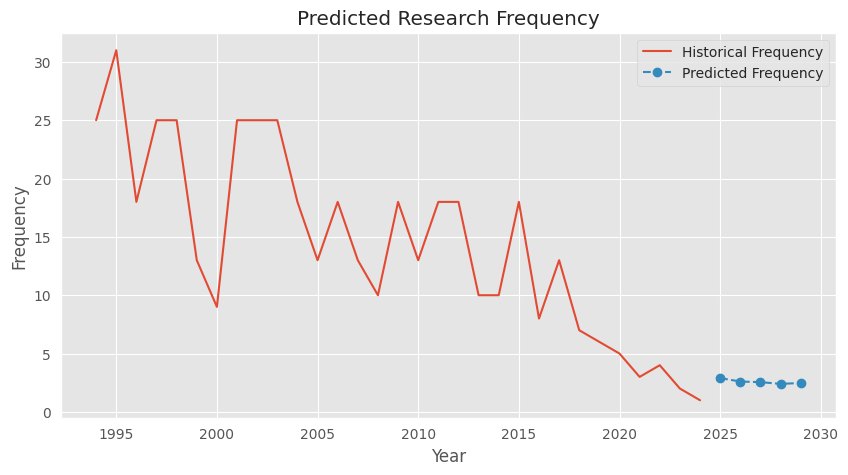

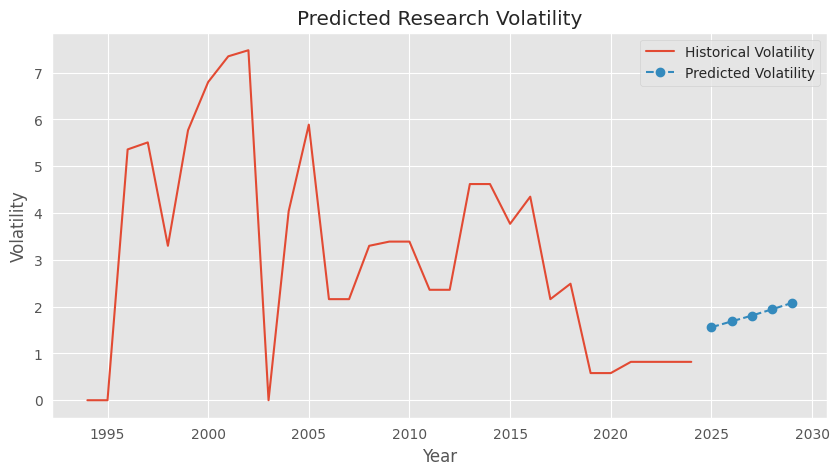

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# -------------------------------
# Historical Data (Example: Quantum Computing)
# -------------------------------
historical_years = list(range(1994, 2025))
historical_frequency = [
    25, 31, 18, 25, 25, 13, 9, 25, 25, 25, 18, 13, 18, 13, 10, 18, 13, 18, 18,
    10, 10, 18, 8, 13, 7, 6, 5, 3, 4, 2, 1
]
historical_volatility = [
    0.0, 0.0, 5.36, 5.51, 3.3, 5.77, 6.8, 7.35, 7.48, 0.0,
    4.04, 5.89, 2.16, 2.16, 3.3, 3.39, 3.39, 2.36, 2.36, 4.62,
    4.62, 3.77, 4.35, 2.16, 2.49, 0.58, 0.58, 0.82, 0.82, 0.82, 0.82
]

# -------------------------------
# Normalize Data
# -------------------------------
scaler_freq = MinMaxScaler(feature_range=(0, 1))
scaler_vol = MinMaxScaler(feature_range=(0, 1))

historical_frequency_scaled = scaler_freq.fit_transform(np.array(historical_frequency).reshape(-1, 1))
historical_volatility_scaled = scaler_vol.fit_transform(np.array(historical_volatility).reshape(-1, 1))

# -------------------------------
# Prepare LSTM Dataset
# -------------------------------
look_back = 5

def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:(i+look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

X_freq, y_freq = create_dataset(historical_frequency_scaled, look_back)
X_vol, y_vol = create_dataset(historical_volatility_scaled, look_back)

# Reshape for LSTM [samples, time steps, features]
X_freq = X_freq.reshape((X_freq.shape[0], X_freq.shape[1], 1))
X_vol = X_vol.reshape((X_vol.shape[0], X_vol.shape[1], 1))

# -------------------------------
# Build LSTM Model
# -------------------------------
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model_freq = build_model((X_freq.shape[1], 1))
model_vol = build_model((X_vol.shape[1], 1))

# Train models
model_freq.fit(X_freq, y_freq, epochs=100, batch_size=16, verbose=0)
model_vol.fit(X_vol, y_vol, epochs=100, batch_size=16, verbose=0)

# -------------------------------
# Predict Future Values
# -------------------------------
def predict_future(model, last_data, scaler, steps=5):
    predictions = []
    current_input = last_data.copy()
    for _ in range(steps):
        pred = model.predict(current_input, verbose=0)
        predictions.append(pred[0, 0])
        current_input = np.roll(current_input, -1, axis=1)
        current_input[0, -1, 0] = pred
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

last_freq_data = historical_frequency_scaled[-look_back:].reshape(1, look_back, 1)
last_vol_data = historical_volatility_scaled[-look_back:].reshape(1, look_back, 1)

predicted_frequency = predict_future(model_freq, last_freq_data, scaler_freq, steps=5)
predicted_volatility = predict_future(model_vol, last_vol_data, scaler_vol, steps=5)

# -------------------------------
# Define predicted years
# -------------------------------
predicted_years = list(range(historical_years[-1]+1, historical_years[-1]+6))

# -------------------------------
# Print Results
# -------------------------------
print("\nPredicted Frequency for next 5 years:")
for year, freq in zip(predicted_years, predicted_frequency.flatten()):
    print(f"Year {year}: Predicted Frequency: {freq:.0f}")

print("\nPredicted Volatility for next 5 years:")
for year, vol in zip(predicted_years, predicted_volatility.flatten()):
    print(f"Year {year}: Predicted Volatility: {vol:.2f}")

# -------------------------------
# Plot Predictions
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(historical_years, historical_frequency, label="Historical Frequency")
plt.plot(predicted_years, predicted_frequency, 'o--', label="Predicted Frequency")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Predicted Research Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(historical_years, historical_volatility, label="Historical Volatility")
plt.plot(predicted_years, predicted_volatility, 'o--', label="Predicted Volatility")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.title("Predicted Research Volatility")
plt.legend()
plt.show()


In [ ]:
# Inverse transform to get the original scale values
predicted_frequency = scaler_freq.inverse_transform(predicted_frequency.reshape(-1, 1))

# Output the predictions in the original scale
print("Predicted Frequency for next 5 years:")
for year, freq in zip(predicted_years, predicted_frequency.flatten()):
    print(f"Year {year}: Predicted Frequency: {freq:.2f}")

Predicted Frequency for next 5 years:
Year 2025: Predicted Frequency: 87.87
Year 2026: Predicted Frequency: 79.13
Year 2027: Predicted Frequency: 77.47
Year 2028: Predicted Frequency: 73.12
Year 2029: Predicted Frequency: 75.22


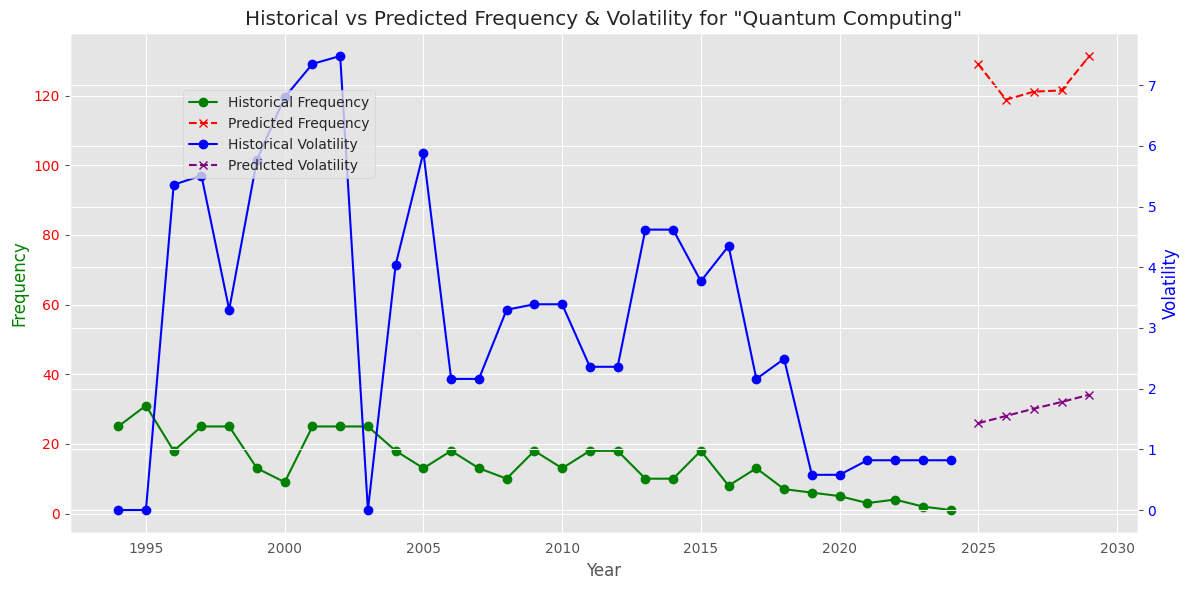

In [ ]:
import matplotlib.pyplot as plt


historical_years = list(range(1994, 2025))
historical_frequency = [25, 31, 18, 25, 25, 13, 9, 25, 25, 25, 18, 13, 18, 13, 10, 18, 13, 18, 18, 10, 10, 18, 8, 13, 7, 6, 5, 3, 4, 2, 1]

historical_volatility = [
    0.0, 0.0, 5.36, 5.51, 3.3, 5.77, 6.8, 7.35, 7.48, 0.0,
    4.04, 5.89, 2.16, 2.16, 3.3, 3.39, 3.39, 2.36, 2.36, 4.62,
    4.62, 3.77, 4.35, 2.16, 2.49, 0.58, 0.58, 0.82, 0.82, 0.82,
    0.82
]


predicted_years = list(range(2025, 2030))
predicted_frequency = [129.06, 118.85, 121.18, 121.52, 131.40]
predicted_volatility = [1.43, 1.55, 1.67, 1.78, 1.90]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(historical_years, historical_frequency, label='Historical Frequency', marker='o', color='green')
ax1.plot(predicted_years, predicted_frequency, label='Predicted Frequency', marker='x', color='red', linestyle='--')

ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency', color='green')
ax1.set_title('Historical vs Predicted Frequency & Volatility for "Quantum Computing"')
ax1.tick_params(axis='y', labelcolor='red')


ax2 = ax1.twinx()
ax2.plot(historical_years, historical_volatility, label='Historical Volatility', marker='o', color='blue')
ax2.plot(predicted_years, predicted_volatility, label='Predicted Volatility', marker='x', color='purple', linestyle='--')


ax2.set_ylabel('Volatility', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)


plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

historical_years = list(range(1994, 2025))
historical_frequency = [25, 31, 18, 25, 25, 13, 9, 25, 25, 25, 18, 13, 18, 13, 10, 18, 13, 18, 18, 10, 10, 18, 8, 13, 7, 6, 5, 3, 4, 2, 1]

historical_volatility = [
    0.0, 0.0, 5.36, 5.51, 3.3, 5.77, 6.8, 7.35, 7.48, 0.0,
    4.04, 5.89, 2.16, 2.16, 3.3, 3.39, 3.39, 2.36, 2.36, 4.62,
    4.62, 3.77, 4.35, 2.16, 2.49, 0.58, 0.58, 0.82, 0.82, 0.82,
    0.82
]



frequency_data = np.array(historical_frequency)
volatility_data = np.array(historical_volatility)


scaler = MinMaxScaler(feature_range=(0, 1))


frequency_data_scaled = scaler.fit_transform(frequency_data.reshape(-1, 1))
volatility_data_scaled = scaler.fit_transform(volatility_data.reshape(-1, 1))

train_frequency = frequency_data_scaled[:-5]
test_frequency = frequency_data_scaled[-5:]
train_volatility = volatility_data_scaled[:-5]
test_volatility = volatility_data_scaled[-5:]

def fit_arima_model(train_data):
    # Fit ARIMA model (p=1, d=1, q=1 for simplicity, adjust as needed)
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fitted = model.fit()
    return model_fitted

# Train ARIMA model
frequency_arima_model = fit_arima_model(train_frequency)
volatility_arima_model = fit_arima_model(train_volatility)

forecast_frequency_arima = frequency_arima_model.forecast(steps=5)
forecast_volatility_arima = volatility_arima_model.forecast(steps=5)

# Step 3: LSTM Model for Frequency and Volatility Prediction
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

train_frequency_lstm = train_frequency.reshape((train_frequency.shape[0], 1, 1))
train_volatility_lstm = train_volatility.reshape((train_volatility.shape[0], 1, 1))

# Create and train LSTM models
frequency_lstm_model = create_lstm_model((train_frequency_lstm.shape[1], train_frequency_lstm.shape[2]))
volatility_lstm_model = create_lstm_model((train_volatility_lstm.shape[1], train_volatility_lstm.shape[2]))

# Training LSTM models
frequency_lstm_model.fit(train_frequency_lstm, train_frequency, epochs=50, batch_size=1, verbose=1)
volatility_lstm_model.fit(train_volatility_lstm, train_volatility, epochs=50, batch_size=1, verbose=1)

# Forecast with LSTM
test_frequency_lstm = test_frequency.reshape((test_frequency.shape[0], 1, 1))
test_volatility_lstm = test_volatility.reshape((test_volatility.shape[0], 1, 1))

forecast_frequency_lstm = frequency_lstm_model.predict(test_frequency_lstm)
forecast_volatility_lstm = volatility_lstm_model.predict(test_volatility_lstm)

# Step 4: Metrics Calculation
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    return mae, rmse, r2

# Calculate metrics for ARIMA and LSTM
freq_mae_arima, freq_rmse_arima, freq_r2_arima = calculate_metrics(test_frequency, forecast_frequency_arima)
vol_mae_arima, vol_rmse_arima, vol_r2_arima = calculate_metrics(test_volatility, forecast_volatility_arima)

freq_mae_lstm, freq_rmse_lstm, freq_r2_lstm = calculate_metrics(test_frequency, forecast_frequency_lstm)
vol_mae_lstm, vol_rmse_lstm, vol_r2_lstm = calculate_metrics(test_volatility, forecast_volatility_lstm)

# Print Metrics for ARIMA and LSTM
print(f"ARIMA Frequency Metrics - MAE: {freq_mae_arima}, RMSE: {freq_rmse_arima}, R²: {freq_r2_arima}")
print(f"ARIMA Volatility Metrics - MAE: {vol_mae_arima}, RMSE: {vol_rmse_arima}, R²: {vol_r2_arima}")
print(f"LSTM Frequency Metrics - MAE: {freq_mae_lstm}, RMSE: {freq_rmse_lstm}, R²: {freq_r2_lstm}")
print(f"LSTM Volatility Metrics - MAE: {vol_mae_lstm}, RMSE: {vol_rmse_lstm}, R²: {vol_r2_lstm}")


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2619
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1330
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0621
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0080
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052
Epoch 13/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024
Epoch 14/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 15/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4466e-04
Epoch 16/50
26/